# Videojuegos con potencial para el 2017

El objetivo del presente proyecto es identificar las plataformas y géneros de videojuegos con mayor potencial de ventas para el año 2017 en tres regiones del mundo: Norte América, Europa y Japón, así como describir diferencias en el comportamiento de los usuarios de estos mercados. 

Se analiza una base de datos con información reelevante sobre títulos de videojuegos, ventas, calificación de usuarios, críticos y clasifiación ESRB (Entertainment Software Rating Board) desde la década de los ochenta hasta 2016.

El análisis se divide en cuatro etapas principales:

 * Importción y visualización inicial. Se realiza la importación de la base de datos y se describen sus principales características, número de filas y columnas, tipos de datos, si existen datos ausentes y/o duplicados y el formato de los datos. En esta sección se establecen los cambios pertinentes a realizar en la etapa de Preparación de datos.

* Preparación de datos: En esta etapa se realizan los cambios establecidos en la etapa anterior así como analizar el tratamiento adecuado para los datos duplicados y ausentes. Dentro de esta etapa se ralizan cambios de tipos de datos de columnas, se modifica el formato de texto de nombres y columnas, se analizan los datos ausentes y duplicados y se propone reemplazar, descartar o modificar de acuerdo a lo que se considere pertinente. También se realiza enriquecimiento de datos, se agregan columnas o datos que puedan enriquecer el análisis.

* Análisis y visualización de datos. En esta etapa se hace el análisis exloratorio de datos, con el objetivo de detectar relaciones entre variables y formular hipótesis para la etapa final. En este caso se analizan los siguientes aspectos:
    * Títulos lanzados anualmente por género y plataforma.
    * Ventas anuales globales por plataforma.
    * Tiempo de reelevancia por plataforma.
    * Ventas anuales globales por género. 
    * Relación entre críticas y ventas.
    * Ventas de juegos multiplataforma.
    * Resumen por región para Norte América, Europa y Japón.
    
* Pruebas de hipóteis. En esta sección se realizan pruebas estadísticas para corroborar o descartar las observciones realizadas en la etapa de análisis exloratorio. En el presente trabajo se
    * Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
    * Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes. 
    

## Importación de datos y librerías

En esta sección se importan los datos y librerías. Se hace una visualización inicial de los datos. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns

sns.set_theme(style="darkgrid") #especifica el tema usado para las gráficas

In [2]:
games = pd.read_csv('/datasets/games.csv')

In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
games.head(10)

Name Platform  Year_of_Release         Genre  \
0                 Wii Sports      Wii           2006.0        Sports   
1          Super Mario Bros.      NES           1985.0      Platform   
2             Mario Kart Wii      Wii           2008.0        Racing   
3          Wii Sports Resort      Wii           2009.0        Sports   
4   Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5                     Tetris       GB           1989.0        Puzzle   
6      New Super Mario Bros.       DS           2006.0      Platform   
7                   Wii Play      Wii           2006.0          Misc   
8  New Super Mario Bros. Wii      Wii           2009.0      Platform   
9                  Duck Hunt      NES           1984.0       Shooter   

   NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     41.36     28.96      3.77         8.45          76.0          8      E  
1     29.08      3.58      6.81         0.77           NaN        NaN    NaN  
2     15.68     12.76      3.79         3.29          82.0        8.3      E  
3     15.61     10.93      3.28         2.95          80.0          8      E  
4     11.27      8.89     10.22         1.00           NaN        NaN    NaN  
5     23.20      2.26      4.22         0.58           NaN        NaN    NaN  
6     11.28      9.14      6.50         2.88          89.0        8.5      E  
7     13.96      9.18      2.93         2.84          58.0        6.6      E  
8     14.44      6.94      4.70         2.24          87.0        8.4      E  
9     26.93      0.63      0.28         0.47           NaN        NaN    NaN

Se calculan los valores ausentes y duplicados.

In [5]:
for columna in games.columns:
    ausentes = games[columna].isna().sum()
    if ausentes > 0:
        print(f'La columna "{columna}" tiene {ausentes} valores ausentes.')

La columna "Name" tiene 2 valores ausentes.
La columna "Year_of_Release" tiene 269 valores ausentes.
La columna "Genre" tiene 2 valores ausentes.
La columna "Critic_Score" tiene 8578 valores ausentes.
La columna "User_Score" tiene 6701 valores ausentes.
La columna "Rating" tiene 6766 valores ausentes.


In [6]:
print(f'La base de datos contiene {games.duplicated().sum()} filas duplicadas')

La base de datos contiene 0 filas duplicadas


La base de datos contiene once columnas que contienen nombre, plataforma, año de lanzamiento, género, ventas en millones de dólares en Norte América, Europa, Japón y otras partes del mundo, calificación de críticos, usuarios y clasificación ESRB.

De las 16715 filas 2 tienen valores ausentes en nombre y género, 269 en año de lanzamiento, 8578 en calificación de críticos, 6701 en califiación de usuarios, 6766  en clasificación. 

Los valores ausentes en género y nombre se reemplazarán como "desconocidos". 

Los valores ausentes en las columnas correspondientes a calificaciones se dejarán como están, ya que es normal que no todos los juegos sean reseñados por críticos y usuarios u obtengan una calificación.

No se detectaron filas con valores completamente duplicados, sin embargo este aspecto se analiza con mayor detalle en la siguiente sección.

La columna correspondiente a año de lanzamiento es tipo coma flotante, se propone cambiarla a tipo entero. 

La columna correspondiente a calificación de usuario es tipo objeto, se propone cambiarla a coma flotante, pues el tipo de calificación admite decimales. 

La columna correspondiente a califiación de críticos es coma flotante, se propone cambiarla a entero, pues esta calificación no admite decimales. 

## Preparación de datos

En base a la visualización anterior se proponen los siguientes cambios:

1. Pasar los títulos de las columnas a minúsculas.

2. Pasar el tipo de dato de la columa 'year_of_release' a entero.

3. Pasar el tipo de dato de la columna 'user_score' a float y 'critic_score' a entero.

4. Reemplazar los valores ausentes en nombre y género con 'unknown'.

5. Analizar los datos con año de lanzamiento ausente.

6. Detectar datos duplicados.

A continuación se cambian los nombres de las columnas a minúsculas.

In [7]:
games.columns = games.columns.str.lower()

### Tipos de datos

Se cambia el tipo de dato de la columna 'user_score' a coma flotante y 'critic_score' a entero.

In [8]:
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')

In [9]:
games['critic_score'] = games['critic_score'].astype('Int64')

Se cambia el tipo de dato de la columna 'year_of_release' a entero. Para evitar errores por valores NaN se utiliza el tipo de dato Int64

In [10]:
games['year_of_release'] = games['year_of_release'].astype('Int64')

### Datos ausentes

A continuación se reemplazan los valores ausentes en la columna 'name' y 'genre' por la cadena 'unknown'.

In [11]:
games[['name', 'genre']] = games[['name','genre']].fillna('unknown')

A continuación se muestran 10 filas con datos ausentes en la columna year_of_release.

In [12]:
games[games['year_of_release'].isna()].sample(10)

name platform  year_of_release       genre  \
8319       James Cameron's Dark Angel      PS2             <NA>      Action   
10790                  Happy Feet Two     X360             <NA>      Action   
4818     LEGO Harry Potter: Years 5-7      3DS             <NA>      Action   
8884                   eJay Clubworld      PS2             <NA>        Misc   
9761   Saru! Get You! Million Monkeys      PS2             <NA>    Platform   
4437                   Super Breakout     2600             <NA>      Puzzle   
16079           Football Manager 2007     X360             <NA>      Sports   
8023                Star Trek: Legacy     X360             <NA>  Simulation   
805                         Rock Band      Wii             <NA>        Misc   
12235  National Geographic Challenge!     X360             <NA>        Misc   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
8319       0.08      0.07      0.00         0.02            48         6.5   
10790      0.08      0.01      0.00         0.01          <NA>         NaN   
4818       0.18      0.19      0.00         0.03            71         6.5   
8884       0.07      0.06      0.00         0.02            69         8.6   
9761       0.00      0.00      0.12         0.00          <NA>         NaN   
4437       0.41      0.03      0.00         0.00          <NA>         NaN   
16079      0.00      0.01      0.00         0.00          <NA>         NaN   
8023       0.14      0.02      0.00         0.01            64         5.5   
805        1.33      0.56      0.00         0.20            80         6.3   
12235      0.06      0.00      0.00         0.00          <NA>         NaN   

      rating  
8319       T  
10790    NaN  
4818    E10+  
8884       E  
9761     NaN  
4437     NaN  
16079    NaN  
8023    E10+  
805        T  
12235    NaN

Los títulos repetidos no parecen ser de alguna plataforma, género o periodo en particular. Por otro lado las filas con datos ausentes en año de lanzamiento representan aproximadamente el 1% del total de la muestra. Debido a estas razones se procede a descartar los estos datos para el presente análisis.

In [13]:
games = games.dropna(axis=0, subset=['year_of_release']).reset_index(drop=True)

### Datos duplicados

Un videojuego puede ser lanzado para diferentes plataformas bajo el mismo nombre o ser actualizado y relanzado posteriormente. Por estas razones se considera juegos como duplicados si comparten el mismo nombre, plataforma y año de lanzamiento.    

In [14]:
games.duplicated(subset=['name', 'platform', 'year_of_release']).sum()

2

Se muestran los datos duplicados bajo los parámetros establecidos anteriormente.

In [15]:
games[games.duplicated(subset=['name', 'platform', 'year_of_release'], keep=False)]

name platform  year_of_release    genre  na_sales  eu_sales  \
600    Madden NFL 13      PS3             2012   Sports      2.11      0.22   
652          unknown      GEN             1993  unknown      1.78      0.53   
14022        unknown      GEN             1993  unknown      0.00      0.00   
15971  Madden NFL 13      PS3             2012   Sports      0.00      0.01   

       jp_sales  other_sales  critic_score  user_score rating  
600        0.00         0.23            83         5.5      E  
652        0.00         0.08          <NA>         NaN    NaN  
14022      0.03         0.00          <NA>         NaN    NaN  
15971      0.00         0.00            83         5.5      E

Los datos duplicados coinciden en todas las columnas menos en las ventas. Es posible que las nuevas filas se hayan añadido para actualizar o complementar la información de ventas de un juego. 

Asumiendo que este es el caso, se procede a corregir los datos pertinentes, es decir, actualizar las ventas de Europa del juego Madden NFL 13 y las ventas del juego desconocido en Japón. Posteriormente se eliminan las filas duplicadas y se reinicia el índice de la base de datos.

In [16]:
#guarda la información de los juegos duplicados
dup = games[games.duplicated(subset=['name', 'platform', 'year_of_release'], keep=False)]

#reemplaza las ventas con la suma de las dos filas correspondientes al título particular. 
games.loc[600, 'eu_sales'] = dup.loc[dup['name'] == 'Madden NFL 13' ,'eu_sales'].sum()
games.loc[652, 'jp_sales'] = dup.loc[dup['name'] == 'unknown' ,'jp_sales'].sum()

#una vez corregidos los datos se procede a quitar las filas duplicadas y corregir los índices.
games = games.drop_duplicates(subset=['name', 'platform', 'year_of_release']).reset_index(drop=True)

### Ventas globales

Se crea la columna 'total_sales' que almacena la suma de todas las ventas de todas las regiones para cada juego.

In [17]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

Se muestra la información y el encabezado de la base de datos despúes de estos cambios.

In [18]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7982 non-null   Int64  
 9   user_score       7462 non-null   float64
 10  rating           9767 non-null   object 
 11  total_sales      16444 non-null  float64
dtypes: Int64(2), float64(6), object(4)
memory usage: 1.5+ MB


In [19]:
games.head()

name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     28.96      3.77         8.45            76         8.0      E   
1      3.58      6.81         0.77          <NA>         NaN    NaN   
2     12.76      3.79         3.29            82         8.3      E   
3     10.93      3.28         2.95            80         8.0      E   
4      8.89     10.22         1.00          <NA>         NaN    NaN   

   total_sales  
0        82.54  
1        40.24  
2        35.52  
3        32.77  
4        31.38

En resumen, se han cambiado los nombres de las columnas a minúsculas, el tipo de dato de la columna de año de lanzamiento ha sido cambiado a entero, la columna calificación de usuario ha sido cambiada a decimal y la calificación de críticos a entero. Se han cambiado los nombres y géneros ausentes como 'unknown'. Se han excluido 269 datos con año de lanzamiento ausente. Se ha integrado la información de 2 videojuegos duplicados en una sola fila y se han eliminado dos filas con información duplicada. Finalmente se ha agregado la columna ventas totales, que almacena las ventas totales de cada videojuego alrededor del mundo.

## Análisis y visualización de datos

En esta sección se analiza información general sobre las ventas de videojuegos a nivel global: el número de lanzamientos al año, ventas por plataforma y por género, duración promedio de plataformas en el mercado, relación entre las críticas y las ventas, diferencias de títulos en distintas plataformas. Todo esto con el objetivo de identificar las mejores plataformas, géneros y tendencias para el año 2017.

### Videojuegos lanzados anualmente

La siguente gráfica muestra el número de lanzamientos anuales a nivel global. Los juegos multiplataforma cuentan como un título aunque hayan sido lanzados en múltiples consolas.

In [20]:
titles_per_year = games.groupby('year_of_release').agg({'name':'nunique', 'platform': 'nunique'}).reset_index()

Text(0, 0.5, 'Titles')

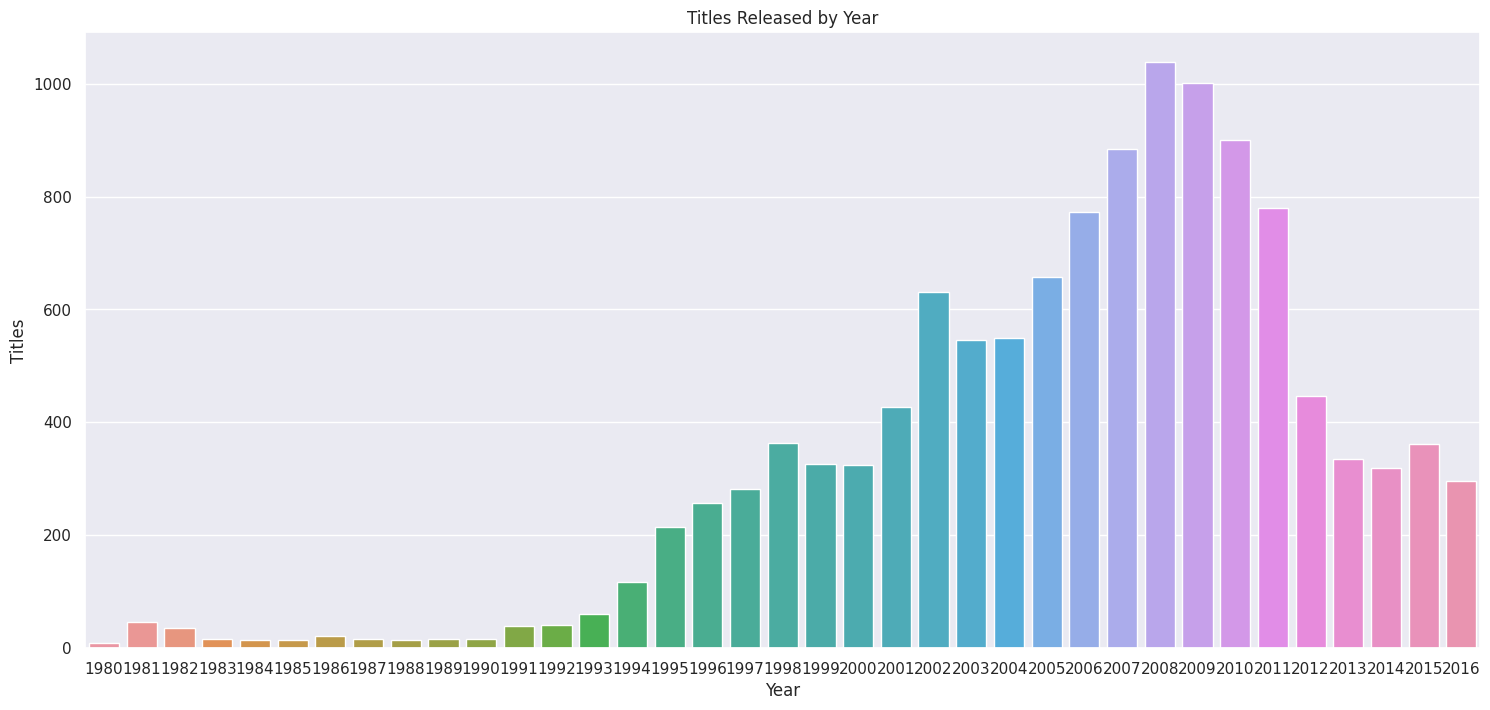

In [21]:
f, ax = plt.subplots(figsize=(18, 8))

sns.barplot(data=titles_per_year, x='year_of_release', y='name')

ax.set_title('Titles Released by Year', )
ax.set_xlabel('Year')
ax.set_ylabel('Titles')


Esta gráfica describe el número de títulos de videojuegos lanzados cada año. Se puede distinguir un periodo que va de la década de los ochenta hasta principios de los noventa en el cual se lanzan unas pocas decenas de títulos. A mediados de los noventa el número de títulos repunta hasta alcanzar un máximo relativo en 1998. A principios de los 2000 se observa un nuevo repunte que culminaría en el año 2008, posteriormente decae el número de lanzamientos hasta la década de los 2010 parece tener el mismo número de lanzamientos que la década de los noventa.

En la siguiente gráfica se muestra el número de videojuegos lanzados cada año, desglosado por géneros.

Text(0, 0.5, 'Videogames Released')

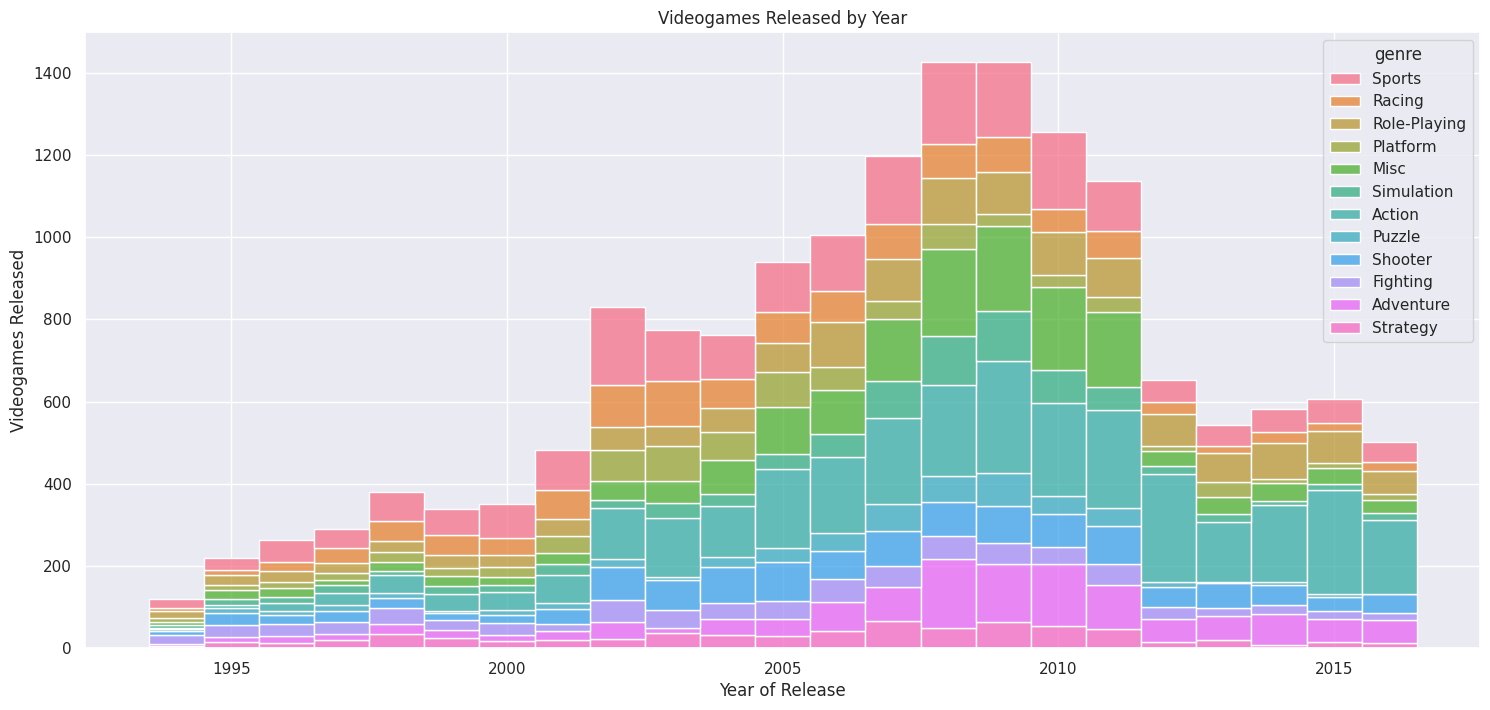

In [22]:
new_games = games[games['year_of_release'] >= 1994]

f, ax = plt.subplots(figsize=(18, 8))

sns.histplot(data=new_games, x='year_of_release', hue='genre', multiple='stack', discrete=True)

ax.set_title('Videogames Released by Year', )
ax.set_xlabel('Year of Release')
ax.set_ylabel('Videogames Released')

Este gráfico muestra e número de videojuegos lanzados cada año desglosado género. En esta gráfica cada juego se contabiliza, de manera que un título lanzado en múltiples plataformas contará por cada una de ellas. Se muestran los datos a partir de 1994, debido a que a partir de este año tanto las ventas como el número de lanzamientos aumentaron drásticamente.

Después de 2012 el géneros géneros con más lanzamientos son acción, juegos de rol, aventura y deportes.
El siguiente gráfico muestra el número de videojuegos lanzados cada año desglosado por plataforma.

Text(0, 0.5, 'Videogames Released')

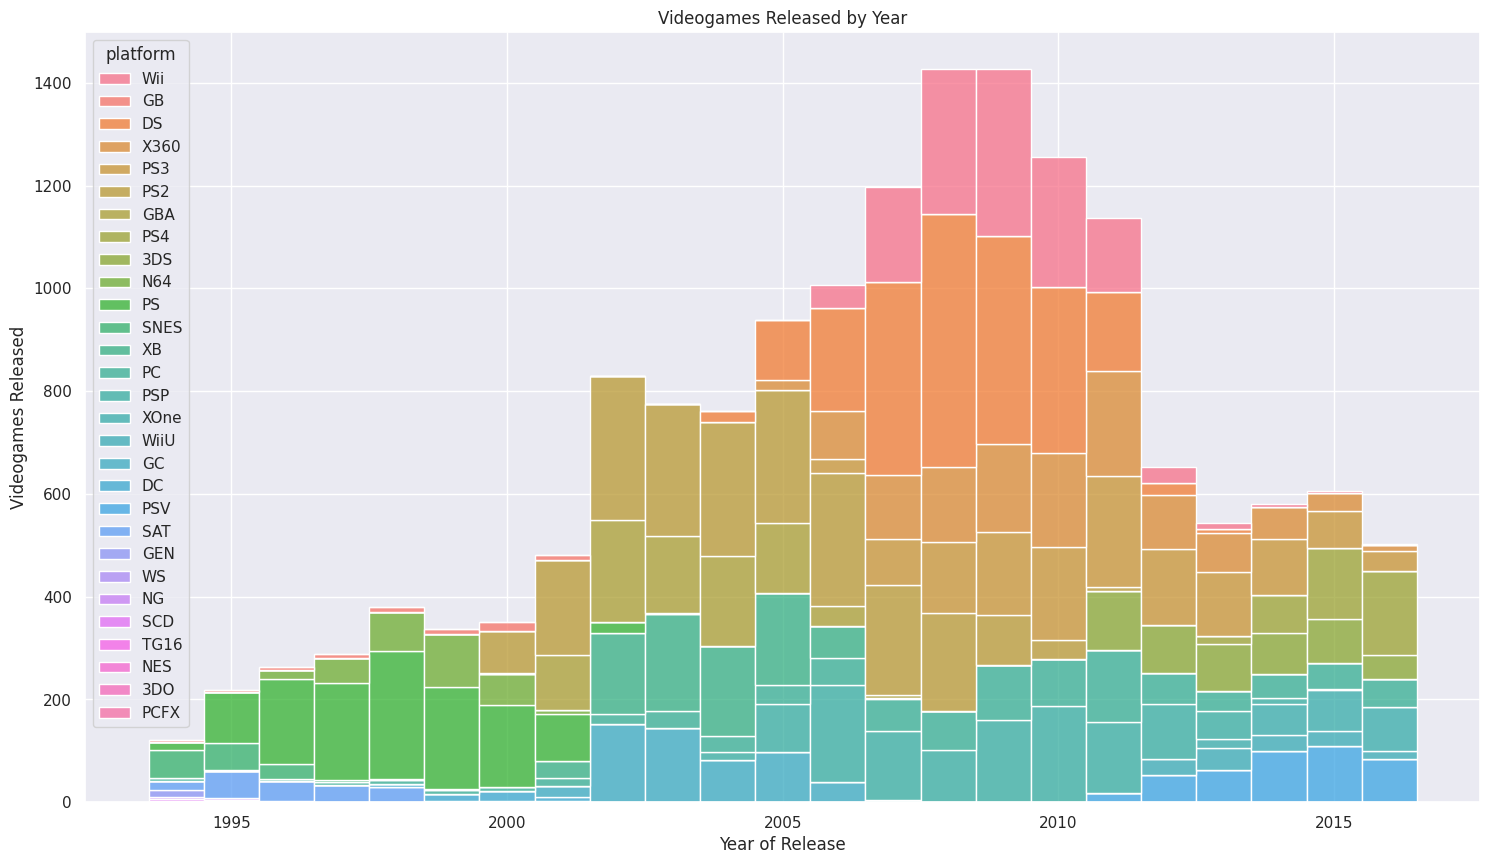

In [23]:
new_games = games[games['year_of_release'] >= 1994]

f, ax = plt.subplots(figsize=(18, 10))

sns.histplot(data=new_games, x='year_of_release', hue='platform', multiple='stack', discrete=True)

ax.set_title('Videogames Released by Year', )
ax.set_xlabel('Year of Release')
ax.set_ylabel('Videogames Released')

Gráfico de número de lanzamientos anuales desglosado por géneros. Se muestran los datos a partir de 1994 para distinguir más detalles. En este gráfico pueden distinguirse plataformas con mayor número de lanzamientos para cada pediodo, sin embargo el número de lanzamientos no necesariamente es un indicador de ventas, este aspecto se explora con mayor profundidad en la siguiente sección. 

En los tres gráficos anteriores se pueden distinguir a grandes rasgos cinco periodos con comportamientos distintos. Aproximadamente podemos diferenciarlos en: el periodo que va desde 1980  hasta  1994, de 1994 al 2000, del 2000 a 2005, de 2005 a 2012 y del 2012 al 2016. 

### Ventas anuales por plataforma

La siguiente gráfica muestra el total anual de ventas globales por plataforma en millones de dólares.

Text(0, 0.5, 'Annual Sales (M dollars)')

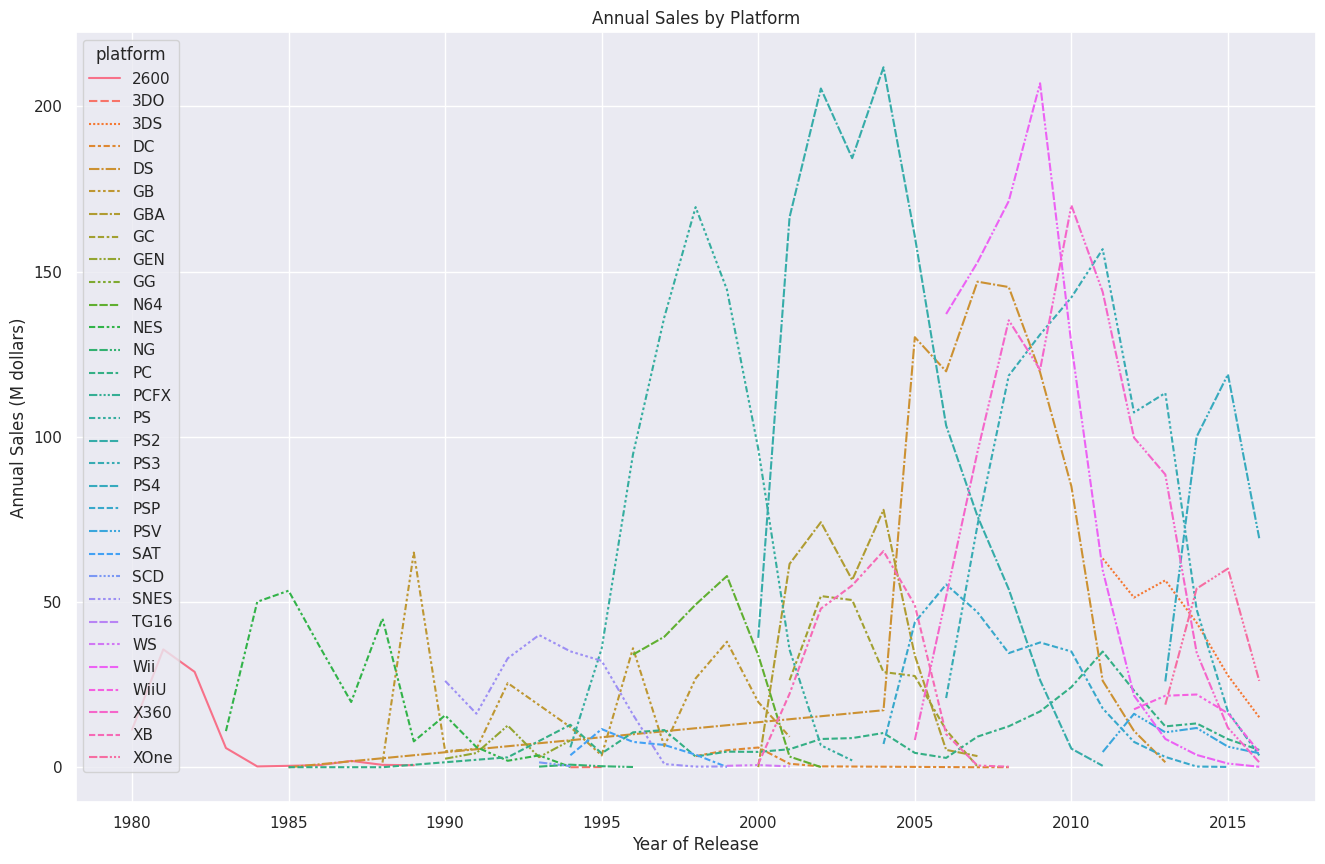

In [24]:
annual_sales_by_platform = games.pivot_table(index='year_of_release', columns='platform',
                                             values='total_sales', aggfunc='sum')

f, ax = plt.subplots(figsize=(16, 10))

sns.lineplot(data=annual_sales_by_platform)

ax.set_title('Annual Sales by Platform')
ax.set_xlabel('Year of Release')
ax.set_ylabel('Annual Sales (M dollars)')

In [25]:
top10_platforms = games.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10)

Text(0, 0.5, 'Platform')

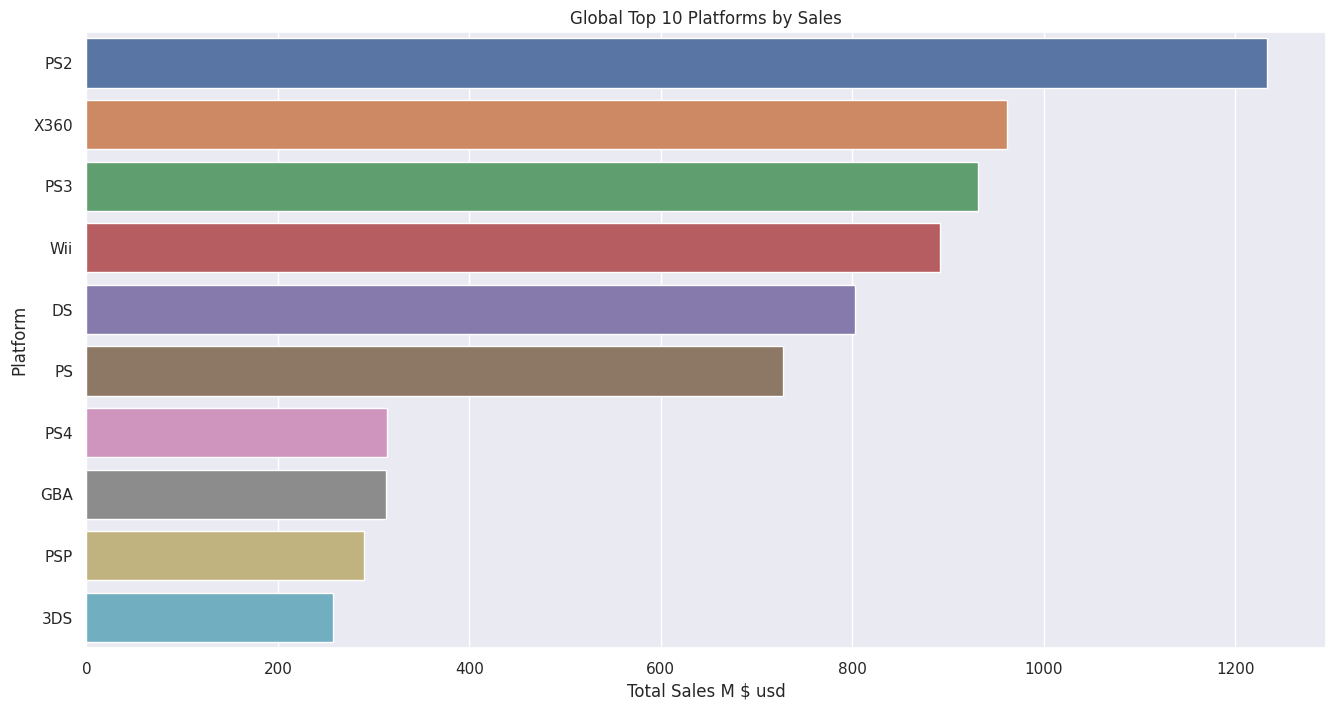

In [26]:
f, ax = plt.subplots(figsize=(16, 8))

sns.barplot(x=top10_platforms.values, y=top10_platforms.index)
ax.set_title('Global Top 10 Platforms by Sales')
ax.set_xlabel('Total Sales M $ usd')
ax.set_ylabel('Platform')

La plataforma Play Station 2 (PS2) es la plataforma con mayores ventas a nivel global, seguida por Xbox 360 (X360), Play Station 3 (PS3), Wii, DS y Play Station (PS).

La siguiente tabla muestra un resumen de las ventas globales por plataforma. Por cada plataforma se muestra el total de ventas de todos los juegos, el número de títulos lanzados, las ventas totales por juego promedio, la desviación estándar de las ventas, el mínimo de ventas totales, los rangos intercuartílicos correspondientes al 25%, 50%, 75% de la muestra y el máximo de ventas totales. Los datos se muestran en orden descendente respecto a las ventas totales.

In [27]:
total = games.groupby('platform').agg({'total_sales': 'sum'})

describe = games.groupby('platform').agg({'total_sales': 'describe'})

total = total.merge(describe, on='platform', how='outer').sort_values(by='total_sales', ascending=False).reset_index()

total

/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/reshape/merge.py:648: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)


platform  total_sales  (total_sales, count)  (total_sales, mean)  \
0       PS2      1233.56                2127.0             0.579953   
1      X360       961.24                1232.0             0.780227   
2       PS3       931.34                1305.0             0.713670   
3       Wii       891.18                1286.0             0.692986   
4        DS       802.78                2121.0             0.378491   
5        PS       727.58                1190.0             0.611412   
6       PS4       314.14                 392.0             0.801378   
7       GBA       312.88                 811.0             0.385795   
8       PSP       289.53                1193.0             0.242691   
9       3DS       257.81                 512.0             0.503535   
10       PC       255.76                 957.0             0.267252   
11       GB       254.43                  97.0             2.622990   
12       XB       251.57                 803.0             0.313288   
13      NES       251.05                  98.0             2.561735   
14      N64       218.01                 316.0             0.689905   
15     SNES       200.04                 239.0             0.836987   
16       GC       196.73                 542.0             0.362970   
17     XOne       159.32                 247.0             0.645020   
18     2600        86.48                 116.0             0.745517   
19     WiiU        82.19                 147.0             0.559116   
20      PSV        53.81                 429.0             0.125431   
21      SAT        33.59                 173.0             0.194162   
22      GEN        30.77                  28.0             1.098929   
23       DC        15.95                  52.0             0.306731   
24      SCD         1.86                   6.0             0.310000   
25       NG         1.44                  12.0             0.120000   
26       WS         1.42                   6.0             0.236667   
27     TG16         0.16                   2.0             0.080000   
28      3DO         0.10                   3.0             0.033333   
29       GG         0.04                   1.0             0.040000   
30     PCFX         0.03                   1.0             0.030000   

    (total_sales, std)  (total_sales, min)  (total_sales, 25%)  \
0             1.138461                0.00              0.0800   
1             1.632122                0.01              0.1100   
2             1.403477                0.00              0.1100   
3             3.165022                0.01              0.0900   
4             1.436042                0.01              0.0500   
5             1.056807                0.01              0.1100   
6             1.609456                0.01              0.0600   
7             0.899654                0.01              0.0550   
8             0.522019                0.01              0.0300   
9             1.441271                0.01              0.0500   
10            0.679745                0.01              0.0200   
11            5.390925                0.06              0.3000   
12            0.539309                0.01              0.0600   
13            5.108012                0.06              1.0000   
14            1.322189                0.01              0.1300   
15            1.869469                0.01              0.1350   
16            0.693974                0.01              0.0600   
17            1.036139                0.01              0.0600   
18            0.956160                0.07              0.3075   
19            1.058836                0.01              0.0800   
20            0.212341                0.01              0.0200   
21            0.218092                0.02              0.0800   
22            1.484933                0.03              0.0700   
23            0.468660                0.02              0.0775   
24            0.584055                0.04              0.0525   
25            

Las cinco plataformas con mayores ventas a nivel global son PS2, X360, PS3, Wii y DS. En la mayoría de las plataformas las ventas promedio por juego no sobrepasan el millón de dólares, excepto por los juegos de las plataformas GB, NES y GEN, sin embargo estas plataforman lanzan menos títulos que sus competidores. 

El promedio de ventas por juego de las diez principales plataformas se encuentra entre 200 mil y 800 mil dólares, aunque estos valores pueden ser poco representativos considerando que existen valores atípicos con ganancias mucho mayores. Por ejemplo, el juego con mayores ventas de todos los tiempos es de la plataforma Wii, con 82 millones de dólares en ventas, mucho mayor que el juego con mayores ventas de cualquiera de las otras plataformas. 

Esta información se puede visualizar en el siguiente diagrama de caja.

[Text(0, 0.01, '10K $'),
 Text(0, 0.1, '100K $'),
 Text(0, 1.0, '1M $'),
 Text(0, 10.0, '10M $'),
 Text(0, 100.0, '100M $')]

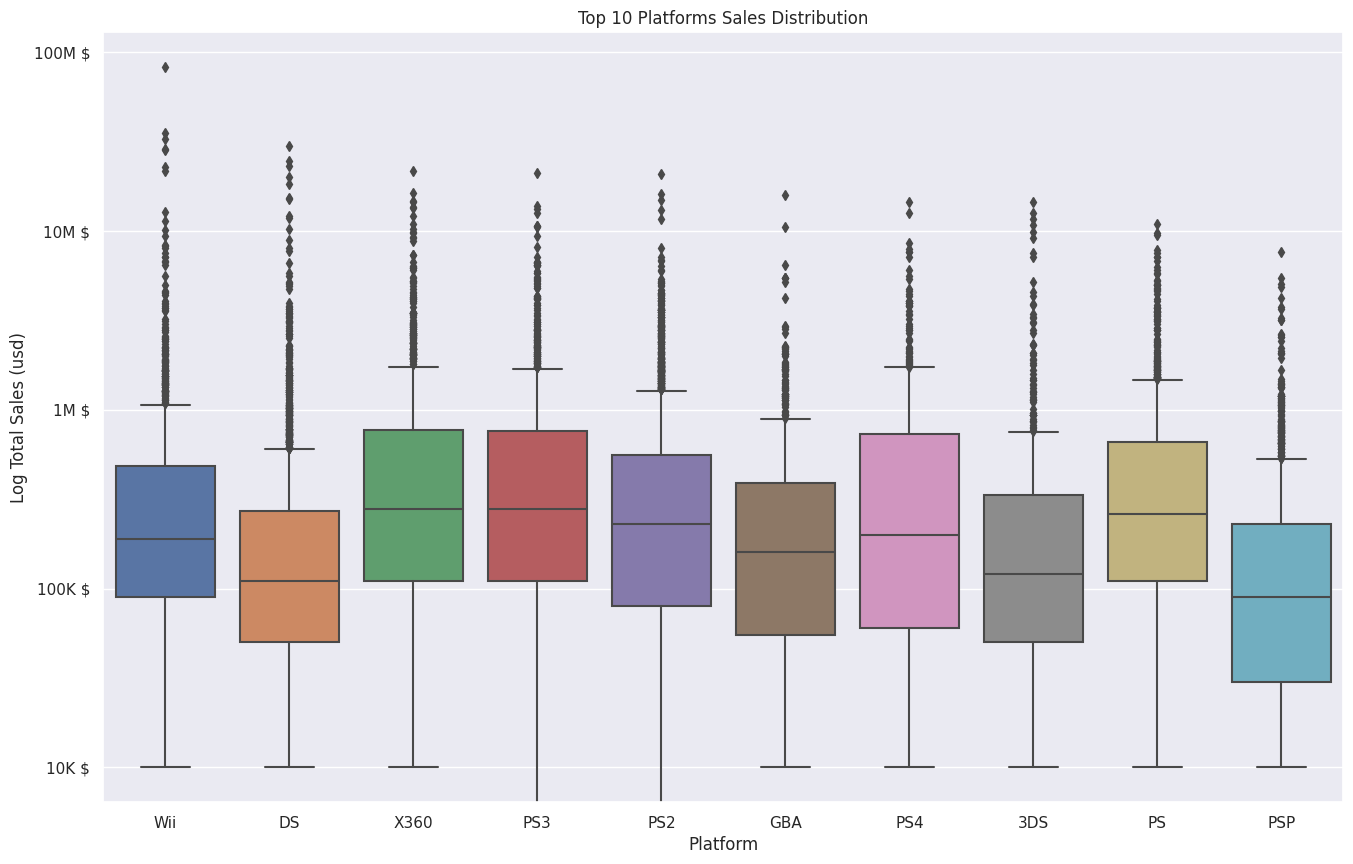

In [28]:
f, ax = plt.subplots(figsize=(16, 10))

total_sales = games

sns.boxplot(data=games[games['platform'].isin(top10_platforms.index)] , x='platform', y='total_sales')
plt.yscale('log')

ax.set_title('Top 10 Platforms Sales Distribution')
ax.set_xlabel('Platform')
ax.set_ylabel('Log Total Sales (usd)')
ax.set_yticks([10**(-2), 10**(-1), 10**0, 10**1, 10**2]) 
ax.set_yticklabels(['10K $','100K $', '1M $', '10M $', '100M $']) 

Este diagrama muestra la distribución de ventas de videojuegos para las 10 plataformas con mayores ventas a nivel global. Las ventas se muestran en escala logarítmica para poder apreciar las diferencias.

En general más del 75% de los juegos no sobrepasan el millón de dólares en ventas globales, sólo unos cuantos valores atípicos logran superar los 10 millones de dólares. La mediana de las ventas de los juegos de estas plataformas se encuentran en alrededor de 100 mil a 300 mil dólares, como se puede corroborar en la tabla anterior. 

### Tiempo de relevancia por plataforma

En esta sección calculan el tiempo promedio durante el cual una plataforma lanza nuevos juegos al mercado. Posteriormente se identifica cuáles de ellas seguirán siendo reelevantes en los próximos años.

A continuación se calculan el años de lanzamiento y el último año con lanzamientos para cada plataforma, y posteriormete se calcula la diferencia entre ambos para conocer el número de años en el que cada plataforma ha tenido ventas.

In [29]:
launch_year = games.groupby('platform')['year_of_release'].min() #primer año con lanzamientos

last_year = games.groupby('platform')['year_of_release'].max() #último año con lanzamientos

duration = last_year - launch_year #años de lanzamientos

A continuación se almacenan las plataformas que no tienen lanzamientos en 2016.

In [30]:
obsolete = list(last_year[last_year < 2016].index) #plataformas cuyo último lanzamiento fue antes del 2016

Se muestra la distribución del número de años en los que estas plataformas han lanzado nuevos videojuegos.

Text(0, 0.5, 'Platforms')

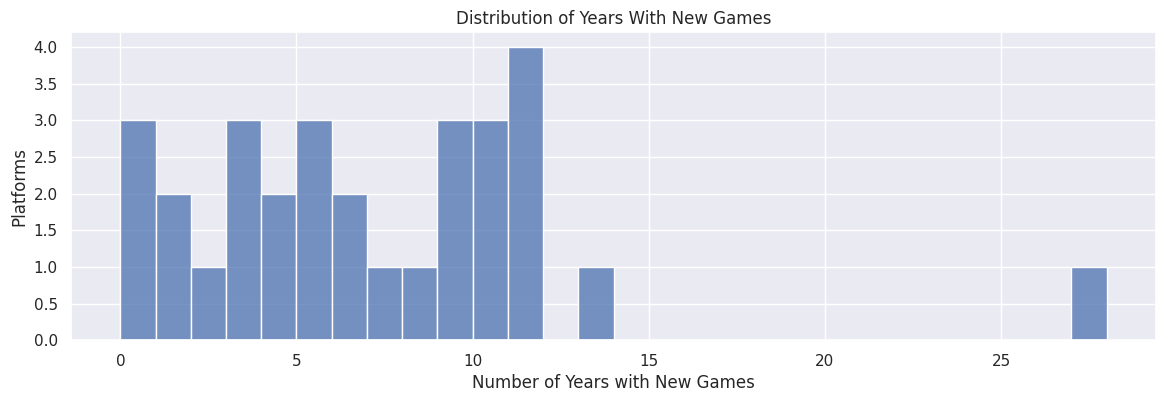

In [31]:
obsolete_plat = games[games['platform'].isin(obsolete)]

f, ax = plt.subplots(figsize=(14,4))

sns.histplot(duration, bins=np.arange(0,29))

ax.set_title('Distribution of Years With New Games'  )
ax.set_xlabel('Number of Years with New Games')
ax.set_ylabel('Platforms')

Gráfica de distribución de número de años en que las plataformas tienen nuevos lanzamientos. Se observa un valor atípico que corresponde a la plataforma DS, que ha lanzado juegos nuevos durante 28 años. Excluyendo esta plataforma se tiene el siguiente resumen para plataformas obsoletas:

In [32]:
duration[duration.index.isin(obsolete) & (duration.index != 'DS')].describe()

count    21.000000
mean      6.000000
std       4.242641
min       0.000000
25%       2.000000
50%       6.000000
75%       9.000000
max      13.000000
Name: year_of_release, dtype: float64

La duración promedio de plataformas es 6 años, el 75% de las plataformas lanzan nuevos juegos durante menos de 9 años, por lo cual las plataformas con potencial de ventas deben tener menos de este tiempo en el mercado.

En la siguiente lista se almacenan los nombres de las plataformmas con lanzamientos en 2016, que llamaremos plataformas vigentes.

In [33]:
current_platforms = list(last_year[last_year == 2016].index)
current_platforms

['3DS', 'PC', 'PS3', 'PS4', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne']

Las plataformas con 6 años o menos en el mercado son:

In [34]:
duration[duration.index.isin(current_platforms) & (duration <= 6)]

platform
3DS     5
PS4     3
PSV     5
WiiU    4
XOne    3
Name: year_of_release, dtype: Int64

En la siguente gráfica se muestran las ventas anuales de las plataformas vigentes a partir del 2005. 

Text(0, 0.5, 'Annual Sales (M dollars)')

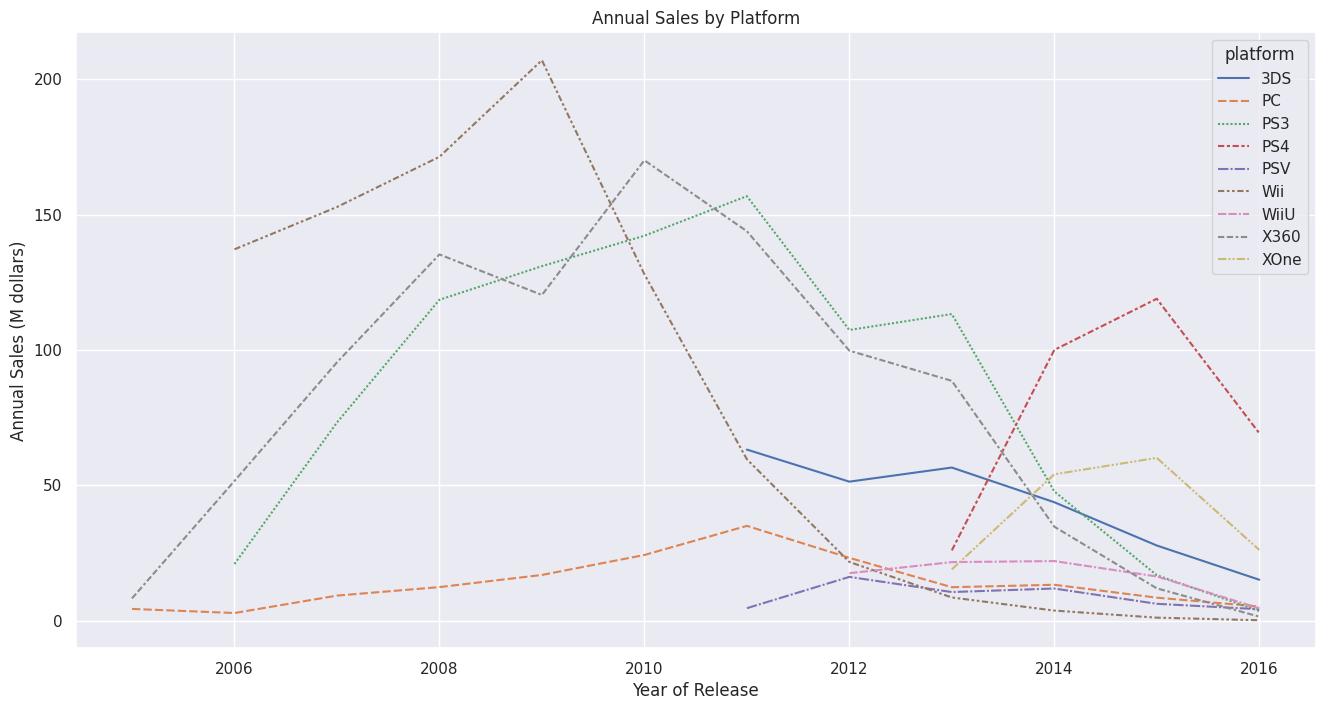

In [35]:
annual_sales_current_platform = games[games['platform'].isin(current_platforms) & (games['year_of_release'] >= 2005)].pivot_table(
    index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

f, ax = plt.subplots(figsize=(16, 8))

sns.lineplot(data=annual_sales_current_platform)

ax.set_title('Annual Sales by Platform')
ax.set_xlabel('Year of Release')
ax.set_ylabel('Annual Sales (M dollars)')

De las plataformas que siguen lanzando juegos en 2016, las que tienen mayores ventas son PS4, XOne y 3DS. Además estas plataformas tienen menos de 6 años en el mercado, por lo que continúan vigentes. 

Adicionalmente se puede considerar invertir en menor medida en juegos de PC, puesto que esta plataforma ha mantenido un nivel estable a lo largo de varias décadas.

###  Relación entre críticas y ventas

En esta sección se analiza la relación estre críticas de profesionales y usuarios con las ventas globales. Esta parte del análisis se enfoca a los juegos de la plataforma PS2, debido a su éxito de ventas y a que es una de las consolas con más títulos.

In [36]:
#filtra los juegos de la plataforma PS2 con ventas mayores a cero.
condition =( (games['platform'] == 'PS2') & (games['total_sales'] > 0.0))

La siguiente gráfica de dispersión muestra las ventas globales en función de la calificación de los críticos.

Text(0, 0.5, 'Total Sales (M usd dollars)')

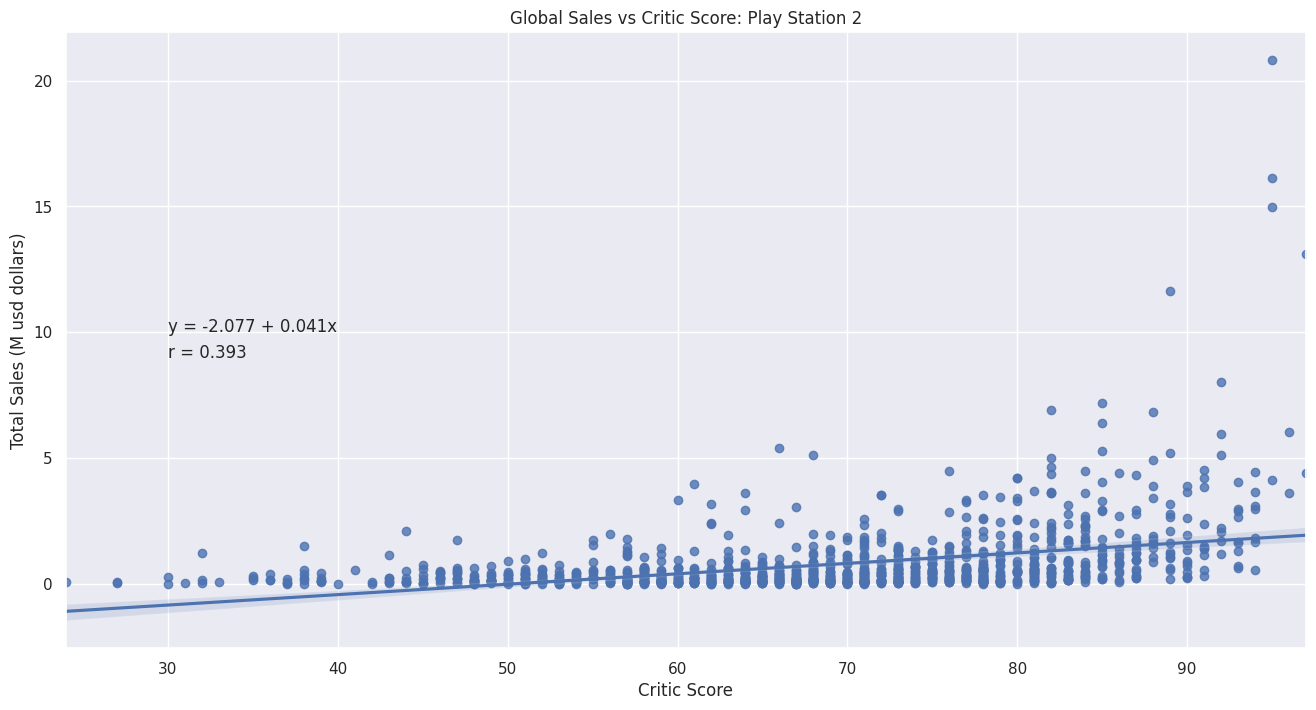

In [37]:
#se toma la calificación de los críticos como variable independiente
x= games[condition]['critic_score'].astype('float') 
y= games[condition]['total_sales'] #las ventas como la variable dependiente.

#establece el tamaño de la gráfica
f, ax = plt.subplots(figsize=(16, 8)) 

p = sns.regplot(x=x, y=y) #gráfico de dispersión con ajuste lineal

#se obtienen los parámetros del ajuste lineal
linear_fit = st.linregress(x=p.get_lines()[0].get_xdata(), y=p.get_lines()[0].get_ydata())

#muestra la ecuación del ajuste lineal (y= slope*x + intercept)
plt.text(30, 10, 'y = ' + str(round(linear_fit.intercept,3)) + ' + ' + str(round(linear_fit.slope,3)) + 'x')

#calcula y muestra el coeficiente de correlación de Pearson
r = x.corr(y)
plt.text(30, 9, 'r = ' + str(round(r,3)) )

#títulos
ax.set_title('Global Sales vs Critic Score: Play Station 2')
ax.set_xlabel('Critic Score')
ax.set_ylabel('Total Sales (M usd dollars)')


Gráfico de ventas globales totales en millones de dólares de títulos lanzados en la plataforma PS2 contra la calificación de críticos. Se muestra el mejor ajuste lineal, su ecuación y el coeficiente de correlación de Pearson. 

Existe una correlación positiva entre las ventas y la calificación de los críticos, aunque esta es menor a 0.5 por lo que se considera débil. Se puede observar que cuanto mayor es la calificación de los críticos las ventas son mucho mayores, por lo que un ajuste lineal puede no ser el más óptimo.

La siguiente gráfica de dispersión muestra la relación entre el logaritmo natural de las ventas globales contra la clasificación de la crítica.

[Text(0, -4, '0.018'),
 Text(0, -3, '0.05'),
 Text(0, -2, '0.135'),
 Text(0, -1, '0.368'),
 Text(0, 0, '1.0'),
 Text(0, 1, '2.718'),
 Text(0, 2, '7.389'),
 Text(0, 3, '20.086')]

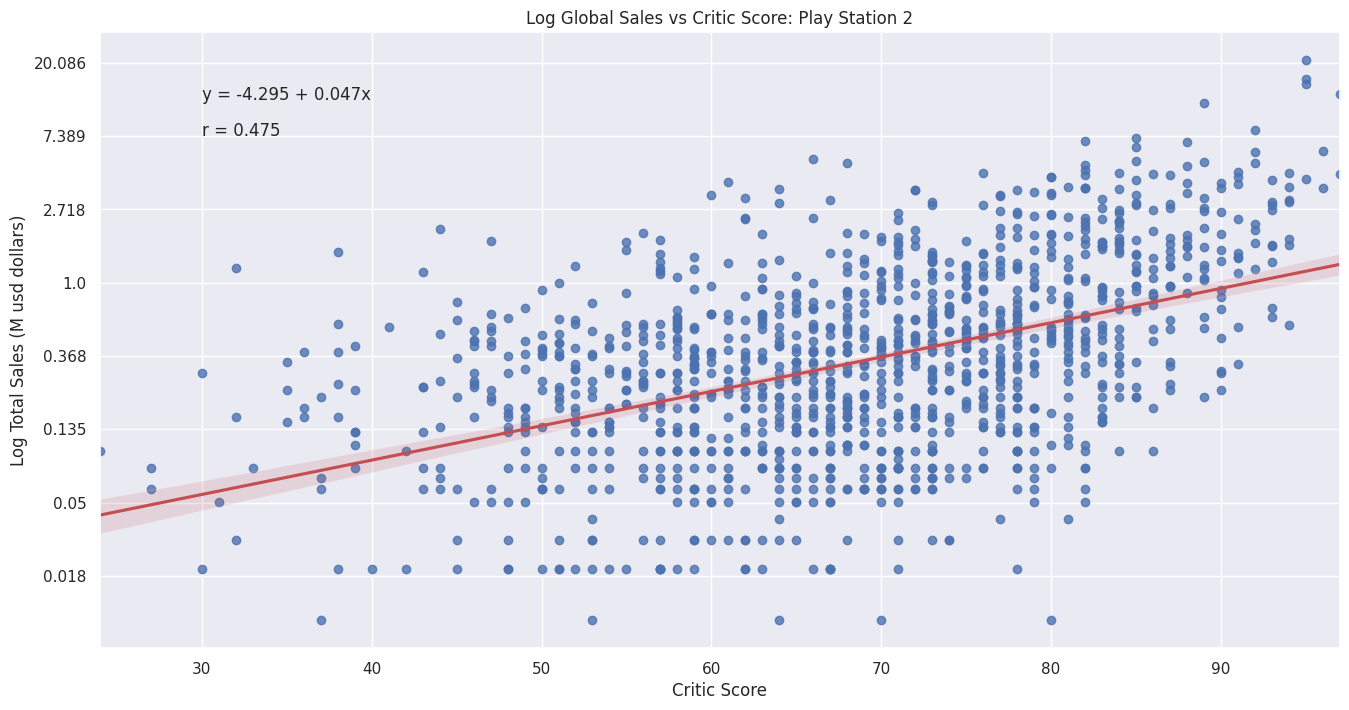

In [38]:
f, ax = plt.subplots(figsize=(16, 8))

#esta vez se toma ln(total_sales) como variable dependiente
x= games[condition]['critic_score'].astype('float')
y= np.log(games[condition]['total_sales'])

p = sns.regplot(x=x, y=y, line_kws=dict(color="r")) #gráfico de dispersión con regresión lineal

#toma los valores de la regresión
exp_fit = st.linregress(x=p.get_lines()[0].get_xdata(), y=p.get_lines()[0].get_ydata())

#calcula y muestra el coeficiente de correlación de Pearson
r_exp = x.corr(y)
plt.text(30, 2, 'r = ' + str(round(r_exp,3)))

#muestra la ecuación del ajuste
plt.text(30, 2.5, 'y = ' + str(round(exp_fit.intercept,3)) + ' + ' + str(round(exp_fit.slope,3)) + 'x')

ax.set_title('Log Global Sales vs Critic Score: Play Station 2')
ax.set_xlabel('Critic Score')
ax.set_ylabel('Log Total Sales (M usd dollars)')
ax.set_yticks(np.arange(-4,4).tolist()) 
ax.set_yticklabels(np.around(np.exp(np.arange(-4,4)), 3).tolist()) 


Esta gráfica muestra el logaritmo natural de las ventas totales contra la calificación de la crítica. Se muestra el mejor ajuste y el coeficiente de Pearson. Como en este caso la variable dependiente es el logaritmo natural de las ventas:

$$ y = ln(total sales)$$

y la ecuación del ajuste es

$$ y = 0.047x - 4.295$$

La relación entre las ventas globales y la crítica es

$$ total sales = e^{0.047(critic score) - 4.295} $$

En la siguiente gráfica se muestra la comparación de ambos ajustes.

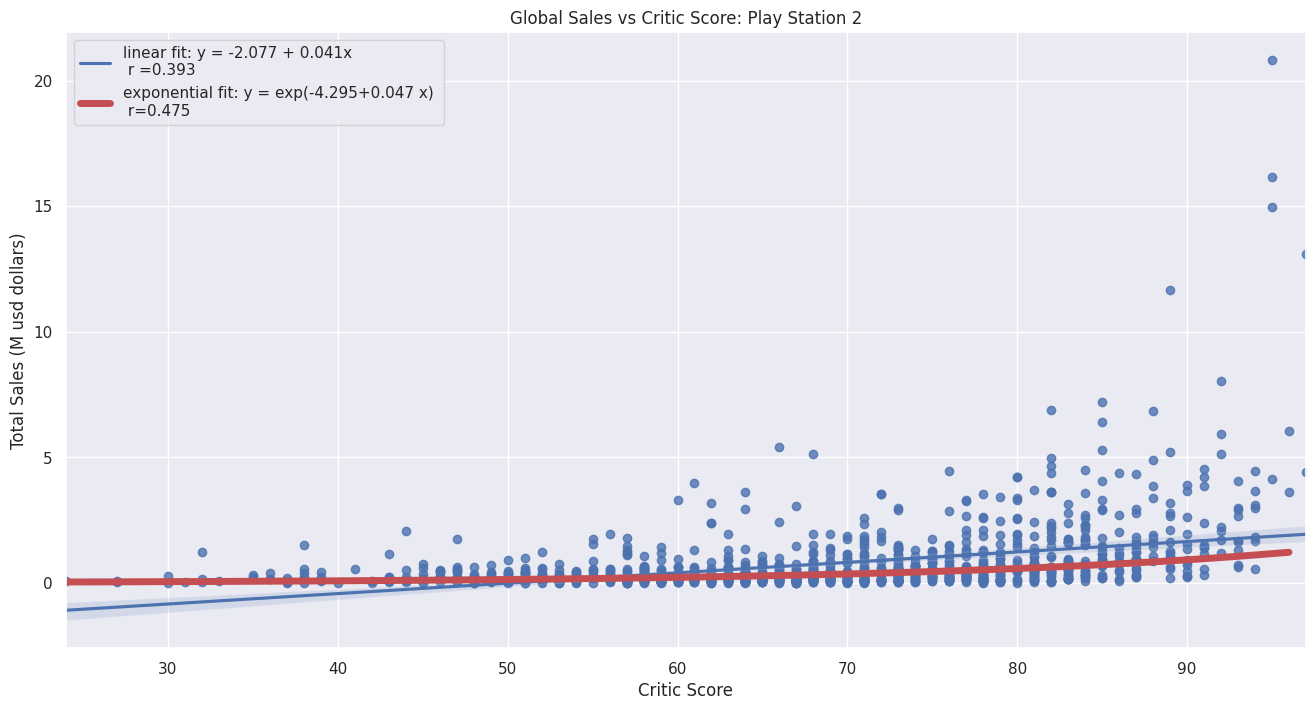

In [39]:
x= games[condition]['critic_score'].astype('float') #se toma la calificación de críticos como variable independiente
y= games[condition]['total_sales'] #las ventas como la variable dependiente.

f, ax = plt.subplots(figsize=(16, 8)) 

p = sns.regplot(x=x, y=y) #gráfico de dispersión 

#ecuaciones de los ajustes y coeficientes de correlación
linear_ec = 'y = ' + str(round(linear_fit.intercept,3)) + ' + ' + str(round(linear_fit.slope,3)) + 'x'
r_linear = x.corr(y)

exp_ec = 'y = exp(' + str(round(exp_fit.intercept,3)) + '+' + str(round(exp_fit.slope,3)) + ' x)'
r_exp = x.corr(np.log(y))

#grafica el ajuste exponencial
grid = np.arange(x.min(),x.max())
ax.plot(grid, np.exp(exp_fit.intercept) *  np.exp(exp_fit.slope *grid), color="r", lw=5)

#títulos y leyendas
ax.set_title('Global Sales vs Critic Score: Play Station 2')
ax.set_xlabel('Critic Score')
ax.set_ylabel('Total Sales (M usd dollars)')
ax.legend([f'linear fit: {linear_ec} \n r ={round(r_linear,3)}', f'exponential fit: {exp_ec} \n r={round(r_exp,3)}'])

Gráfico de ventas globales en millones de dólares estadounidenses contra calificación de críticos. Se muestran un ajuste lineal (azul) y uno exponencial (rojo). El ajuste exponencial tiene mayor coeficiente de correlación que el lineal, aunque ambos son menores que 0.5.

A continuación se hace un procedimiento análogo para comprender la relación entre ventas totales y calificaciones de usuarios.

[Text(0, -4, '0.018'),
 Text(0, -3, '0.05'),
 Text(0, -2, '0.135'),
 Text(0, -1, '0.368'),
 Text(0, 0, '1.0'),
 Text(0, 1, '2.718'),
 Text(0, 2, '7.389'),
 Text(0, 3, '20.086')]

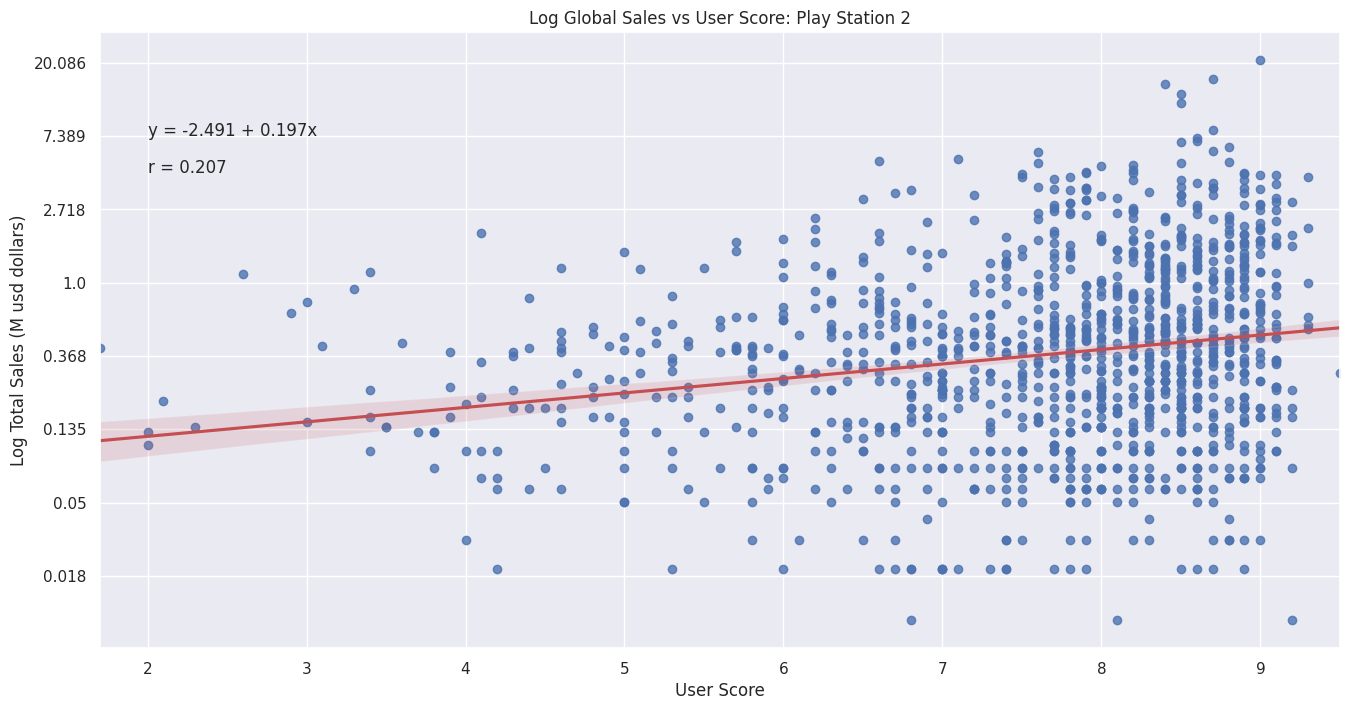

In [40]:
#se toma la calificación de usuarios como variable independiente
x= games[condition]['user_score'].astype('float64') 
y= np.log(games[condition]['total_sales'])

f, ax = plt.subplots(figsize=(16, 8))

p = sns.regplot(data=games[condition], x=x, y=y, line_kws=dict(color="r"))

#toma los valores de la regresión
exp_fit = st.linregress(x=p.get_lines()[0].get_xdata(), y=p.get_lines()[0].get_ydata())

#calcula y muestra el coeficiente de correlación de Pearson
r_exp = x.corr(y)
plt.text(2, 1.5, 'r = ' + str(round(r_exp,3)))

plt.text(2, 2, 'y = ' + str(round(exp_fit.intercept,3)) + ' + ' + str(round(exp_fit.slope,3)) + 'x')


ax.set_title('Log Global Sales vs User Score: Play Station 2')
ax.set_xlabel('User Score')
ax.set_ylabel('Log Total Sales (M usd dollars)')
ax.set_yticks(np.arange(-4,4).tolist()) 
ax.set_yticklabels(np.around(np.exp(np.arange(-4,4)),3).tolist()) 


Gráfico del logaritmo natural de las ventas globales contra calificación de usuario. Se muestra el mejor ajuste en rojo, su ecuación y el coeficiente de correlación de Pearson. Existe una correlación positiva débil, de 0.2. 

En el siguiente gráfico se muestra la comparación entre un ajuste lineal y uno exponencial.

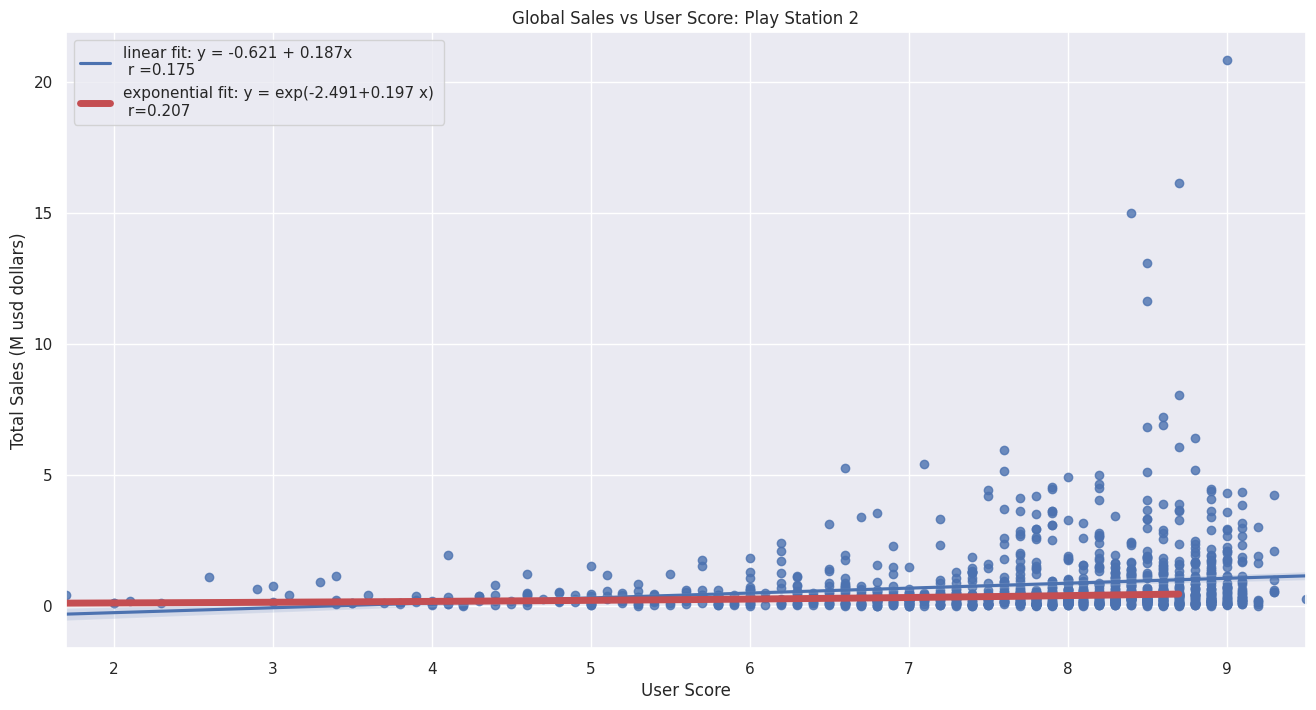

In [41]:
x= games[condition]['user_score'].astype('float') #se toma la calificación de usuarios como variable independiente
y= games[condition]['total_sales']

f, ax = plt.subplots(figsize=(16, 8)) 

p = sns.regplot(x=x, y=y) #gráfico de dispersión con ajuste lineal

#se obtienen los parámetros del ajuste lineal
linear_fit = st.linregress(x=p.get_lines()[0].get_xdata(), y=p.get_lines()[0].get_ydata())

#ecuació del ajuste lineal y coeficiente de correlación
linear_ec = 'y = ' + str(round(linear_fit.intercept,3)) + ' + ' + str(round(linear_fit.slope,3)) + 'x'
r_linear = x.corr(y)

#ecuación del ajuste exponencial obtenido previamente y coeficiente de correlación
exp_ec = 'y = exp(' + str(round(exp_fit.intercept,3)) + '+' + str(round(exp_fit.slope,3)) + ' x)'
r_exp = x.corr(np.log(y))

#grafica el ajuste exponencial
grid = np.arange(x.min(),x.max())
ax.plot(grid, np.exp(exp_fit.slope *grid + exp_fit.intercept), color="r", lw=5)

ax.set_title('Global Sales vs User Score: Play Station 2')
ax.set_xlabel('User Score')
ax.set_ylabel('Total Sales (M usd dollars)')
ax.legend([f'linear fit: {linear_ec} \n r ={round(r_linear,3)}', f'exponential fit: {exp_ec} \n r={round(r_exp,3)}'])

Gráfico de ventas globales en millones de dólares estadounidenses contra calificación de usuarios. Se muestran el mejor ajuste lineal (azul) y un ajuste exponencial (rojo).  El ajuste exponencial muestra un coeficiente de correlación mayor al ajuste lineal, sin embargo ambos son débiles.

Valores atípicos con ventas que rebasan los 10 millones de dólares hacen que el ajuste lineal no sea el más óptimo. 


En general se puede concluir que un ajuste exponencial tiene mayor correlación que un ajuste lineal. 

La calificación de los críticos tiene mayor correlación con las ventas globales que la calificación de los usuarios para los juegos de la plataforma Play Station 2. 

### Juegos multiplataforma

En esta sección se analizan diferencias en ventas de los mismos títulos en diferentes plataformas. Se toman como referencia títulos publicados para las plataformas PS4 y XOne, debido a que estas plataformas fueron lanzadas el mismo año, son recientes y son las que mayores ventas registran. 

Primero se filtran los títulos multiplataforma, es decir videojuegos con el mismo título lanzados en distintas plataformas.

In [42]:
multiplatform = games[games.duplicated(subset=['name'], keep=False)] #videojuegos multiplataforma

A continuación se filtran exclusivamente los títulos que han sido lanzados para PS4 y XOne.

In [43]:
plat_list = ['PS4', 'XOne'] #plataformas a comparar

#encuentra los nombres de videojuegos multiplataforma lanzados con la plataforma 1
titles1 = multiplatform[multiplatform['platform'] == plat_list[0]]['name'].unique().tolist()

#encuentra los nombres de videojuegos multiplataforma lanzados con la plataforma 2
titles2 = multiplatform[multiplatform['platform'] == plat_list[1]]['name'].unique().tolist()

#filtra el dataframe por títulos que fueron lanzados en ambas plataformas
target_titles = multiplatform[multiplatform['name'].isin(titles1) & multiplatform['name'].isin(titles2) &  multiplatform['platform'].isin(plat_list)]
mp_sales = target_titles.pivot_table(index='name', columns='platform', values='total_sales', aggfunc='sum')

[Text(0, 0.01, '10K $'),
 Text(0, 0.1, '100K $'),
 Text(0, 1.0, '1M $'),
 Text(0, 10.0, '10M $')]

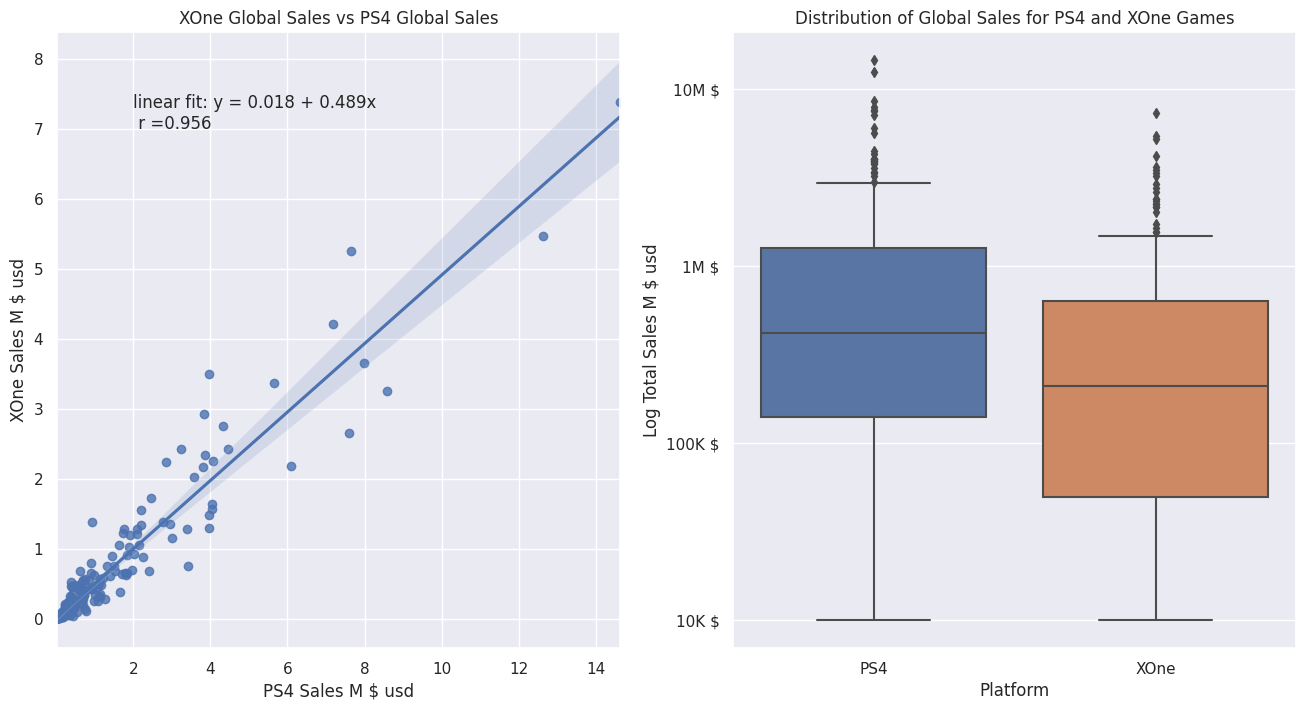

In [45]:
fig, (ax1, ax2) = plt.subplots(ncols= 2, figsize=(16,8))

p = sns.regplot(data=mp_sales, x='PS4',  y='XOne', ax=ax1 ) #gráfico de dispersión con ajuste lineal

ax1.set_title('XOne Global Sales vs PS4 Global Sales')
ax1.set_xlabel('PS4 Sales M $ usd')
ax1.set_ylabel('XOne Sales M $ usd')

#se obtienen los parámetros del ajuste lineal
linear_fit = st.linregress(x=p.get_lines()[0].get_xdata(), y=p.get_lines()[0].get_ydata())

#ecuació del ajuste lineal y coeficiente de correlación
linear_ec = 'y = ' + str(round(linear_fit.intercept,3)) + ' + ' + str(round(linear_fit.slope,3)) + 'x'
r_linear = mp_sales['PS4'].corr(mp_sales['XOne'])

#muestra la ecuación y el coeficiente de correlación
ax1.text(2, 7, f'linear fit: {linear_ec} \n r ={round(r_linear,3)}')

sns.boxplot(data=target_titles, x='platform', y='total_sales', ax=ax2)
plt.yscale('log')

ax2.set_title('Distribution of Global Sales for PS4 and XOne Games')
ax2.set_xlabel('Platform')
ax2.set_ylabel('Log Total Sales M $ usd')

ax2.set_yticks([10**(-2), 10**(-1), 10**0, 10**1]) 
ax2.set_yticklabels(['10K $','100K $', '1M $', '10M $']) 


A la izquierda gráfica de dispersión de ventas globales en Xbox One contra ventas globales en PS4, ambas en millones de dólares estadounidenses.  Se muestra el mejor ajuste lineal, su ecuación y coeficiente de correlación. Existe una fuerte correlación entre las ventas de ambas plataformas (r>0.9), lo cual sugiere que los usuarios de PS4 y XOne siguen los mismos criterios para comprar juegos. Por otro lado, la pendiente del ajuste lineal muestra que un juego lanzado en Xbox One tiene aproximadamente la mitad de las ventas que el mismo juego lanzado en PS4. Esto se puede observar también en el diagrama de la derecha. 

A la derecha diagrama de caja de la distribución de ventas globales para las plataformas PS4 y XOne. En promedio un título tiene mayores ventas en PS4 que su contraparte en XOne.

Ambas gráficas muestran que, aunque las ventas en estas plataformas están fuertemente correlacionadas, en promedio un juego en Xbox One tendrá aproximadamente 0.489 veces las ventas de su contraparte en PS4, menos de la mitad. Esto sugiere que no existen diferencias significativas en la popularidad de títulos entre usarios de plataformas Xbox y PS4, sin embargo como PS4 tiene mayor proporción del mercado, las ventas en esta plataforma serán mayores. 

### Ventas por género

En esta sección se muestran las ventas globales anuales totales y promedio por cada género, para determinar cuáles son los que tienen mayor potencial de ventas. 

En el siguiente gráfico se muestran las ventas globales anuales totales por cada género.

Text(0, 0.5, 'Annual Sales M $ usd')

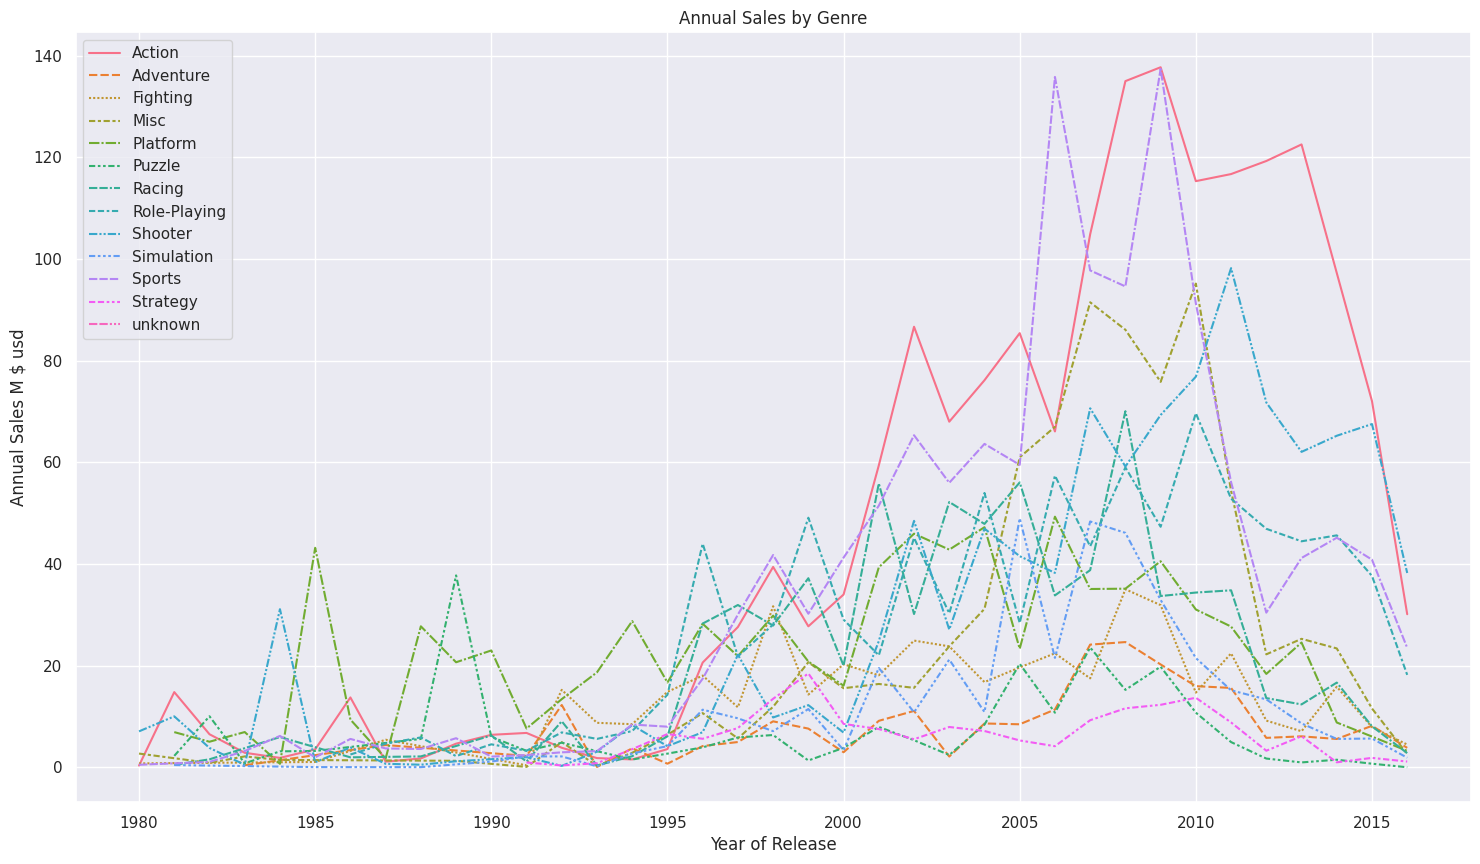

In [46]:
annual_sales_by_genre = games.pivot_table(index='year_of_release',
                                      columns='genre',
                                      values='total_sales',
                                      aggfunc='sum')

f, ax = plt.subplots(figsize=(18, 10))
sns.lineplot(data=annual_sales_by_genre)

plt.legend(loc='upper left')
ax.set_title('Annual Sales by Genre')
ax.set_xlabel('Year of Release')
ax.set_ylabel('Annual Sales M $ usd')

Gráfico de ventas globales anuales totales en millones de dólares estadounidenses por género. Se puede notar una tendencia al alza en las ventas que llega a un máxmo alrededor del 2008, posteriormente se muestra una caída generalizada en las ventas. 

Se observa que en el último periodo los géneros con mayores ventas son Acción, Juego de Rol, Deportes y *Shooter*. 

A continuación se calcula la proporción de ventas globales anuales por cada género, para lo cual se divide el total de ventas anuales por cada género entre el total de ventas de ese año.

In [47]:
annual_sales_by_genre = annual_sales_by_genre.reset_index().set_index('year_of_release')
genre_prop = annual_sales_by_genre.div(annual_sales_by_genre.sum(axis=1), axis=0) 

El siguiente gráfico muestra la proporción de ventas anuales por cada género.

Text(0, 0.5, 'Proportion of Annual Sales')

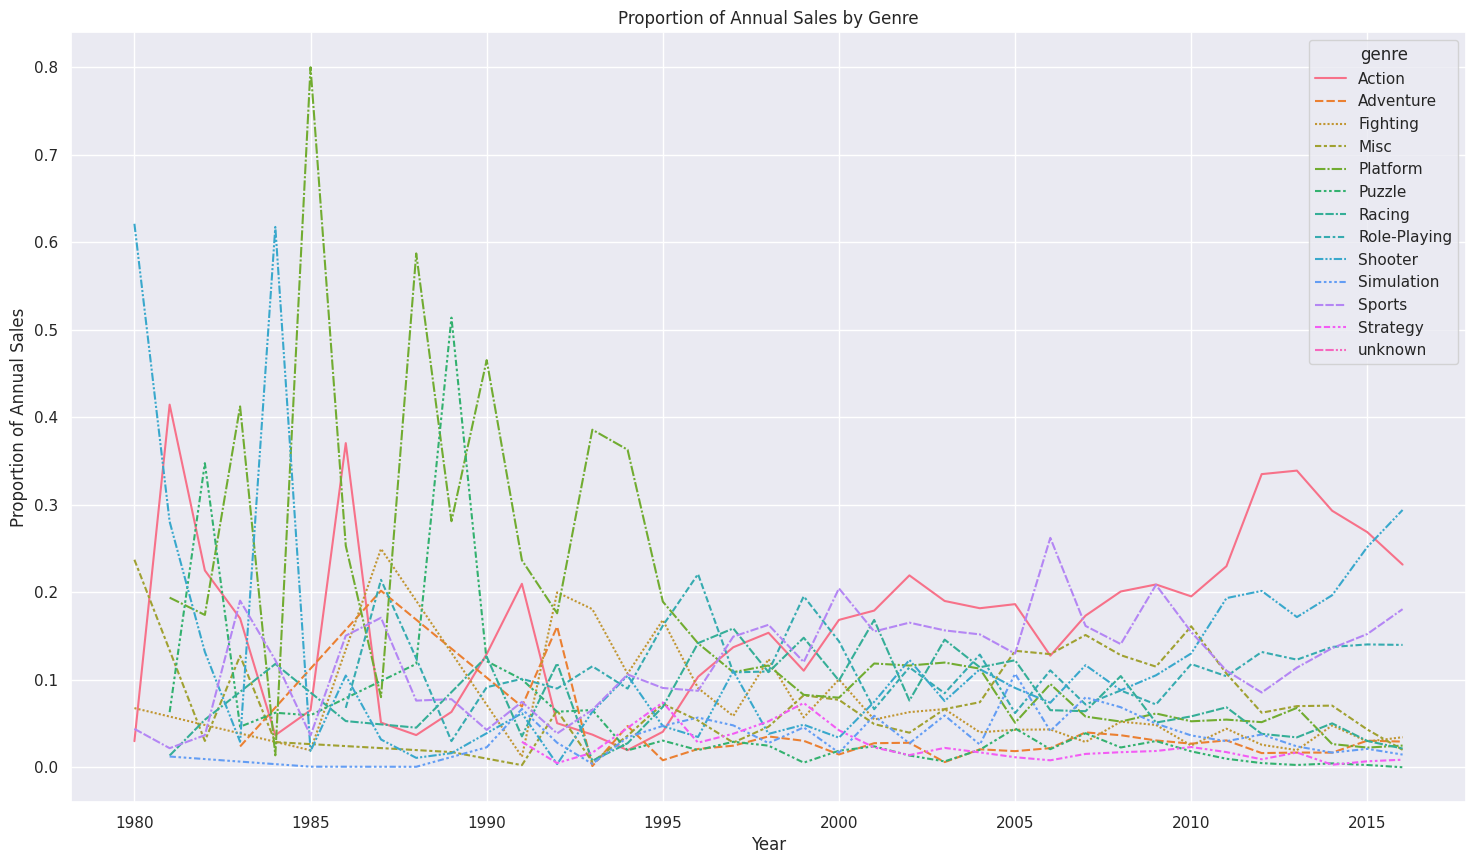

In [48]:
f, ax = plt.subplots(figsize=(18, 10))

sns.lineplot(data=genre_prop)

#plt.legend(loc='upper left')
ax.set_title('Proportion of Annual Sales by Genre')
ax.set_xlabel('Year')
ax.set_ylabel('Proportion of Annual Sales')

Gráfico de proporción de ventas totales por género por cada año. Se puede observar que antes de 1994 la proporción de ventas por cada género fluctua más, posterior a este año, la proporción de mercado de cada género es más estable.

Los cuatro géneros con mayor proporción de ventas globales en 2016 son *shooter*, acción, deportes y juegos de rol, por lo que se sugiere seguir invirtiendo en estos géneros. 

Finalmente se calcula el promedio anual de ventas por cada género.

Text(0, 0.5, 'Average Sales M $ usd')

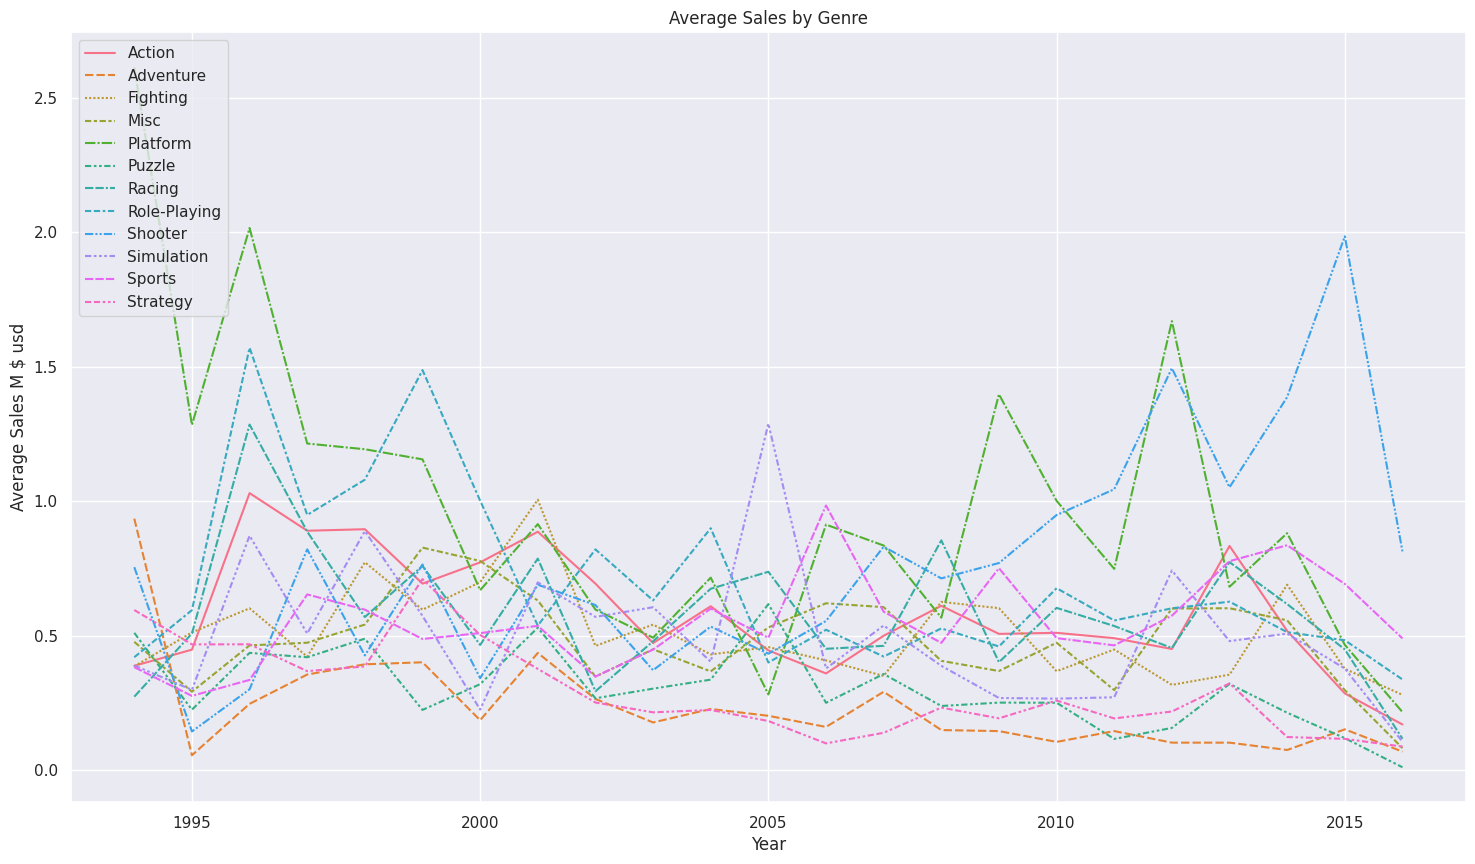

In [49]:
mean_sales_by_genre = new_games.pivot_table(index='year_of_release',
                                      columns='genre',
                                      values='total_sales',
                                      aggfunc='mean')

f, ax = plt.subplots(figsize=(18, 10))
sns.lineplot(data=mean_sales_by_genre)

plt.legend(loc='upper left')
ax.set_title('Average Sales by Genre')
ax.set_xlabel('Year')
ax.set_ylabel('Average Sales M $ usd')

Gráfico de promedio anual de ventas por género en millones de dólares estadounidenses. En los últimos años los géneros más rentables son *shooter*, deportes, juego de rol.

La aparente disrepancia entre ventas totales y promedio de ventas se puede explicar debido al número de títulos lanzados por cada género. Como se puede corroborar en el gráfico de la sección de lanzamientos por año por género, se lanzaron más títulos en el género Acción que en el género *Shooter*.

## Resumen por región del mundo

En esta sección se hace un resumen por cada región de ventas para determinar.

 * Las 5 plataformas con mayor cuota de mercado.
 * Los 5 géneros con mayor proporción de ventas.
 * La distribución de ventas por rating.
 
 Se analizan sólo los datos de las plataformas con lanzamientos en 2016, y se analizan sólo los datos a partir del 2005, para tomar en cuenta los datos recientes más reelevantes. Se realizan tres funciones para estos objetivos.

In [50]:
conditions = ( games['platform'].isin(current_platforms) & (games['year_of_release'] >= 2005))

#diccionario de códigos de región y nombre de región.
names = {'na': 'North America', 'eu': 'Europe', 'jp' : 'Japan', 'other': 'Other', 'total': 'Global'}

La siguiente función grafica las ventas anuales por plataforma y género para una región dada. Esta función ayuda a visualizar las tendencias de ventas.

In [51]:
def trends(reg_code):
    
    col = str(reg_code) + '_sales' #devuelve la columna adecuada
    
    #ventas anuales por plataforma
    sales_platform = games[conditions].pivot_table(
    index='year_of_release', columns='platform', values=col , aggfunc='sum')
    
    #ventas anuales por género
    sales_genre = games[conditions].pivot_table(
    index='year_of_release', columns='genre', values=col , aggfunc='sum')
    
    #figura con dos gráficas en dos filas
    fig, axs = plt.subplots(nrows=2, figsize=(18,10))
    
   #gráfico para ventas por plataforma 
    sns.lineplot(data=sales_platform, ax=axs[0])
    axs[0].set_title(f"{names[reg_code]}'s Annual Sales by Platform")
    axs[0].set_ylabel('Sales (M dollars)')
    axs[0].set_xlabel('Year')
    
    #gráfico para ventas por género
    sns.lineplot(data=sales_genre, ax=axs[1])
    axs[1].set_title(f"{names[reg_code]}'s Annual Sales by Genre")
    axs[1].set_ylabel('Sales (M dollars)')
    axs[1].set_xlabel('Year')
    
    return plt.show()

La siguiente función calcula las ventas anuales del año 2016 para cada plataforma y género, para una región de ventas determinada. Posteriormente realiza dos gráficos de pastel con los porcentajes de mercado. 

In [52]:
def top5(region_code): 
    
    #nombre de columna
    col = str(region_code) + '_sales'
    
    #filtra para juegos lanzados en 2016, agrupa por plataforma y género y suma las ventas de la región
    plat = games[games['year_of_release'] == 2016].groupby('platform')[col].sum().sort_values(ascending=False)
    gen = games[games['year_of_release'] == 2016].groupby('genre')[col].sum().sort_values(ascending=False)
    
    #crea una figura con dos gráficos
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(14,8), subplot_kw={'aspect':'equal'})
    
    #gráfico de pastel para plataformas
    ax1.pie(plat, labels=plat.index, autopct='%1.1f%%', textprops=dict(weight='bold'))
    ax1.set_title(f'Platform Market Share: \n {names[region_code]} 2016')
    
    #gráfico de pastel para géneros
    ax2.pie(gen, labels=gen.index, autopct='%1.1f%%', textprops=dict(weight='bold'))
    ax2.set_title(f'Proportion of total sales by Genre \n {names[region_code]} 2016')

    return plt.show()

La siguiente fucnión realiza un diagrama de caja de la distribución de ventas para determinada región desglosada por calificación ESRB.

In [53]:
def clas_dist(region_code):
    
    #nombre de columna
    col = str(region_code) + '_sales'
    
    #filtra para plataformas vigentes y juegos con ventas mayores a cero en la región especificada
    condition = (games[col] > 0.0) & conditions
        
    f, ax = plt.subplots(figsize=(14, 5 ))
    
    #diagrama de caja con escala log
    sns.boxplot(data=games[condition], x='rating', y=col)
    plt.yscale('log')
    
    #títulos de ejes y etiquetas
    ax.set_title(f'Sales Distribution by Rating: {names[region_code]}')
    ax.set_xlabel('Rating')
    ax.set_ylabel('Log Sales (usd)')
    ax.set_yticks([10**(-2), 10**(-1), 10**0, 10**1, 10**2]) 
    ax.set_yticklabels(['10K $','100K $', '1M $', '10M $', '100M $'])
    
    return plt.show()

### Norte América

A continuación se muestra el resúmen de ventas para la región de Norte América.

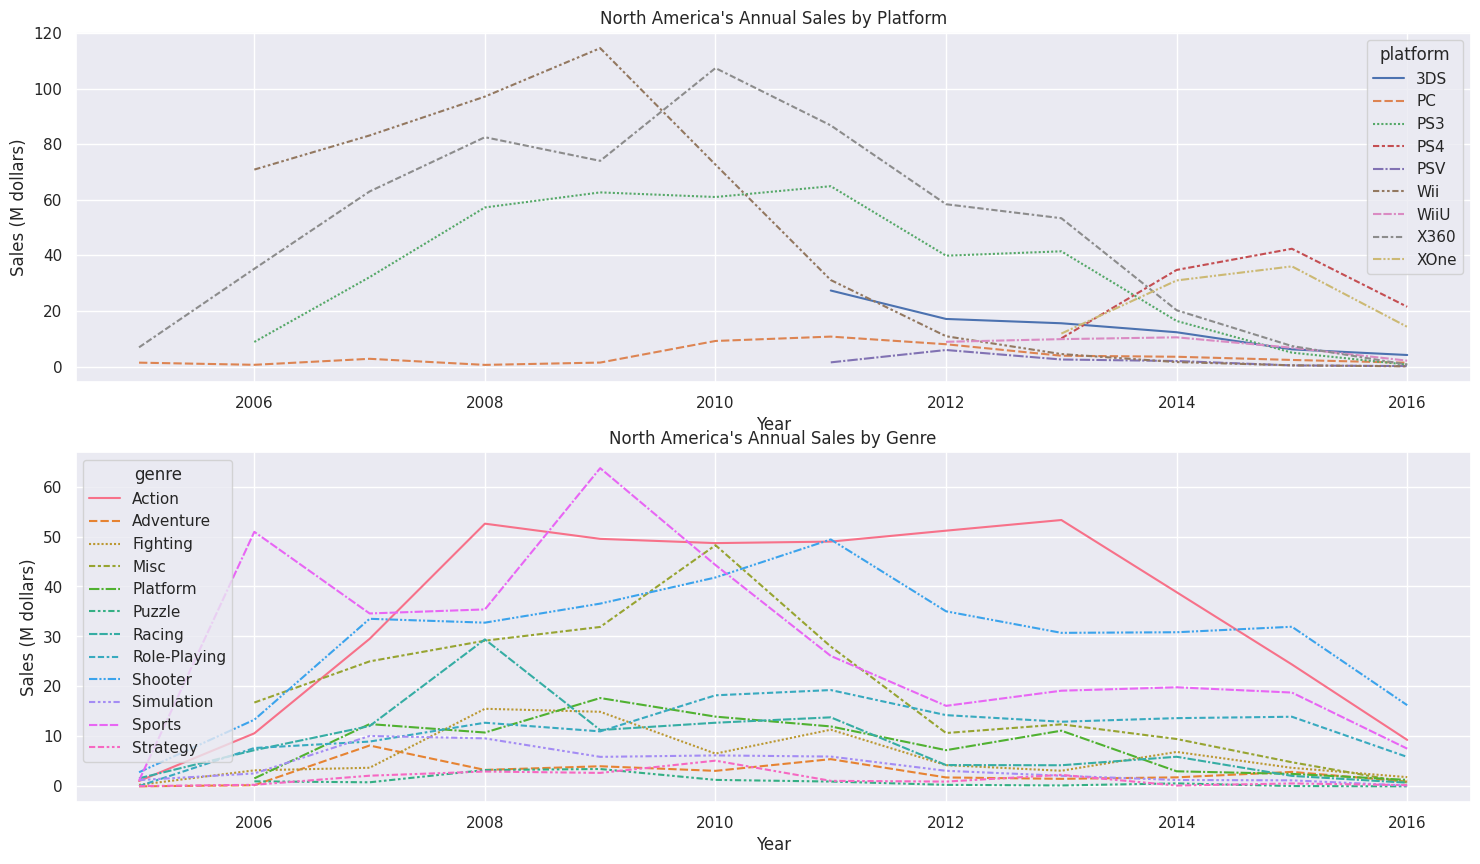

In [54]:
trends('na')

Arriba: gráfico de ventas anuales en Norte América por plataforma. Abajo: gráfico de ventas anuales en Norte América por género.

En ambas gráficas se observa una disminución de ventas en general. Las tendencias son estables en este periodo, por lo que es probable que continúen las mismas tendencias para el año siguiente, a reserva de que nuevas plataformas salgan al mercado. 

A continuación se muestran las plataformas y géneros y su porcentaje del mercado en Norte América para el año 2016. 

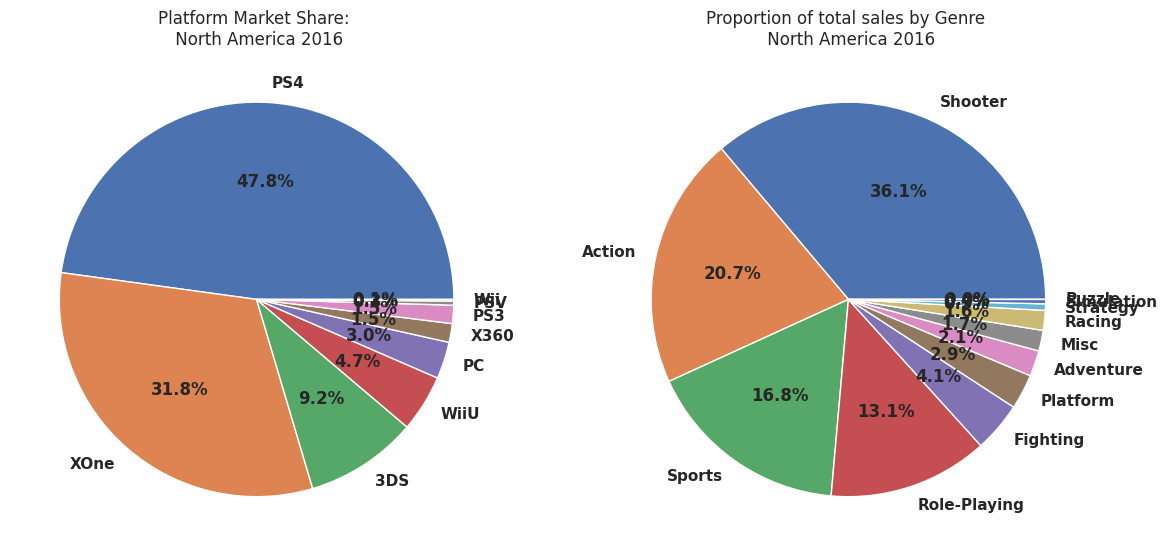

In [55]:
top5('na')

Las cinco plataformas con mayor cuota de mercado son PS4 con 47.8%, Xbox One con 31.8%, 3DS con 9.2%, Wii U con 4.7% y PC con 3.0%. 

Los cinco géneros con mayor proporción de ventas son *Shooter* con 36.1%, Acción con 20.7%, Deportes con 16.8%, Juego de Rol con 13.1% y Peleas con 4.1%.

A continuación se muestra un diagrama de caja con la distribución de ventas en Norte América desglosado por clasificación ESRB.

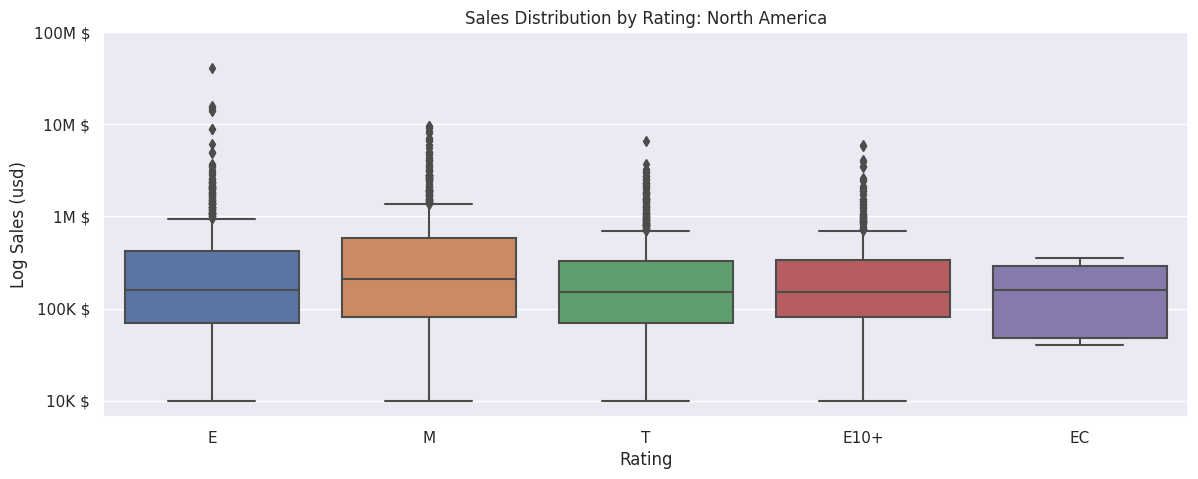

In [56]:
clas_dist('na')

Los géneros con más ventas en Norte América son Acción, Deportes, *Shooter*, Misceláneo y Juego de Rol.

Diagrama de caja con la distribuciones de ventas en Norte América para cada clasificación del sistema ESRB. Las ventas se muestran en escala logarítmica para apreciar las diferencias. Se muestran las calificaciones *E* apto para todos, *M* apto para mayores de 17 años, *T* apto para mayores de 13 años, *E10+* apto para mayores de 10 años y *EC* dirigido a menores de 6 años. 

Los juegos con clasificación E tienen una distribución más sesgada y EC la distribución menos sesgada. En general la mediana de todos los juegos es paroximadamente la misma, por lo que no parece haber diferencias estadísticamente  significativas entre las ventas promedio de un juego por su clasificación. 

### Europa

Se muestra el resumen de ventas de 2016 para la región de Europa

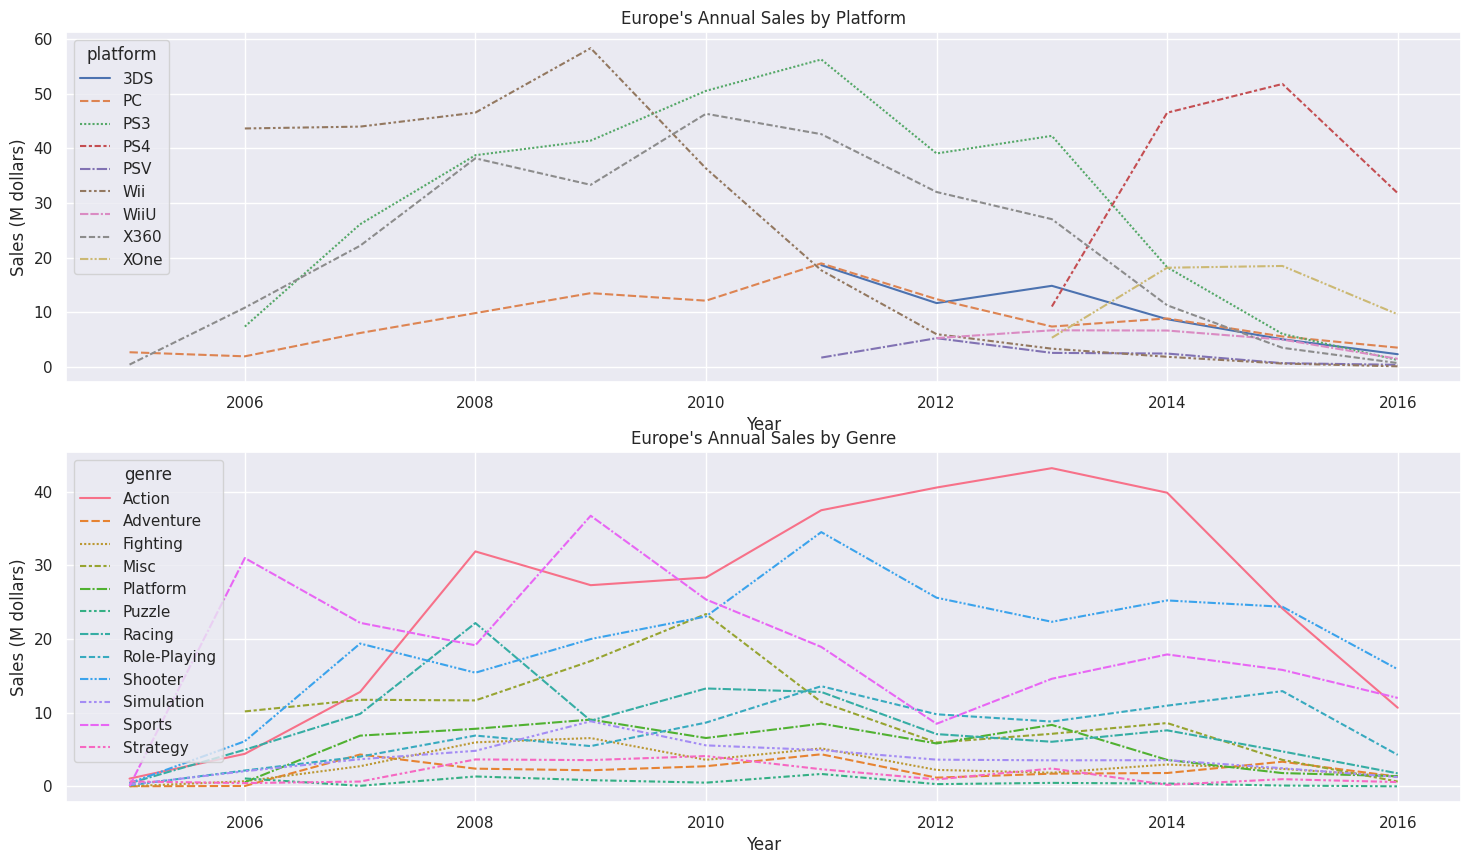

In [57]:
trends('eu')

Arriba: gráfico de ventas anuales en Europa por plataforma. Abajo: gráfico de ventas anuales en Europa por género.

Al igual que para el caso de Norte América, no parece haber cambios drásticos en las tendencias en los últimos años, por lo que es probable que continúen con las mismas tendencias. 

A continuación se muestran las plataformas y géneros y su porcentaje del mercado en Europa para el año 2016. 

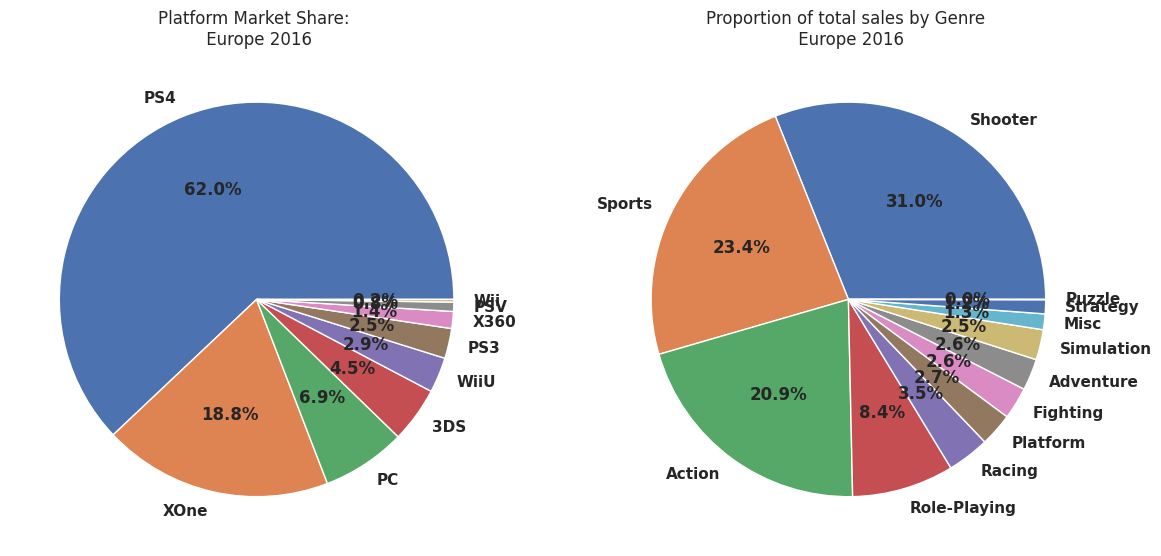

In [58]:
top5('eu')

Las cinco plataformas con mayor cuota de mercado son PS4 con 62.0%, Xbox One con 18.8%, PC con 6.9%, 3DS con 4.5% y Wii U con 2.9%. Las mismas plataformas líderes en Norte América, PS4 y XOne lideran el mercado. PC, 3DS y Wii U en distintas posiciones. 

Los cinco géneros con mayor proporción de ventas son *Shooter* con 31.0%, Deportes con 23.4%, Acción con 20.9%, Juego de Rol con 8.4% y Carreras con 3.5%. Igual que en Norte América el género preferido por los europeos es *Shooting*, pero el segundo es Deportes en lugar de Acción. 

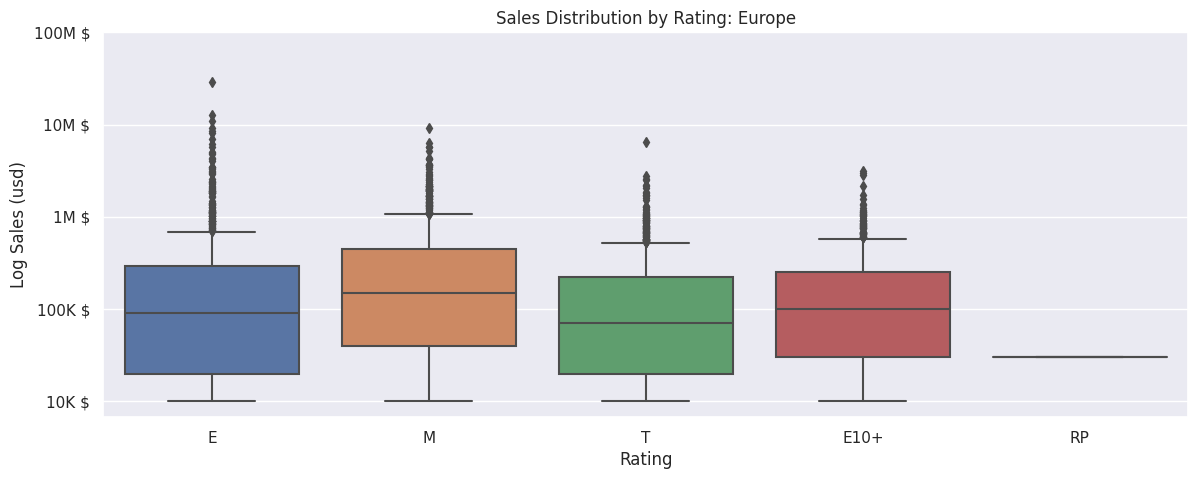

In [59]:
clas_dist('eu')

Diagrama de caja con la distribuciones de ventas en Europa para cada clasificación del sistema ESRB. Las ventas se muestran en escala logarítmica para apreciar las diferencias. Se muestran las calificaciones *E* apto para todos, *M* apto para mayores de 17 años, *T* apto para mayores de 13 años, *E10+* apto para mayores de 10 años y *EC* dirigido a menores de 6 años. 

Los juegos con clasificación E tienen una distribución más sesgada. En general la mediana de todos los juegos es paroximadamente la misma, por lo que no parece haber diferencias estadísticamente  significativas entre las ventas promedio de un juego por su clasificación. La única diferencia parece ser que no hubo ventas en este periodo de juegos bajo la clasificación EC y hay un pequeño número de juegos con clasificación pendiente (Rating Pending)

### Japón

A continuación se muestra el resúmen de ventas para Japón.

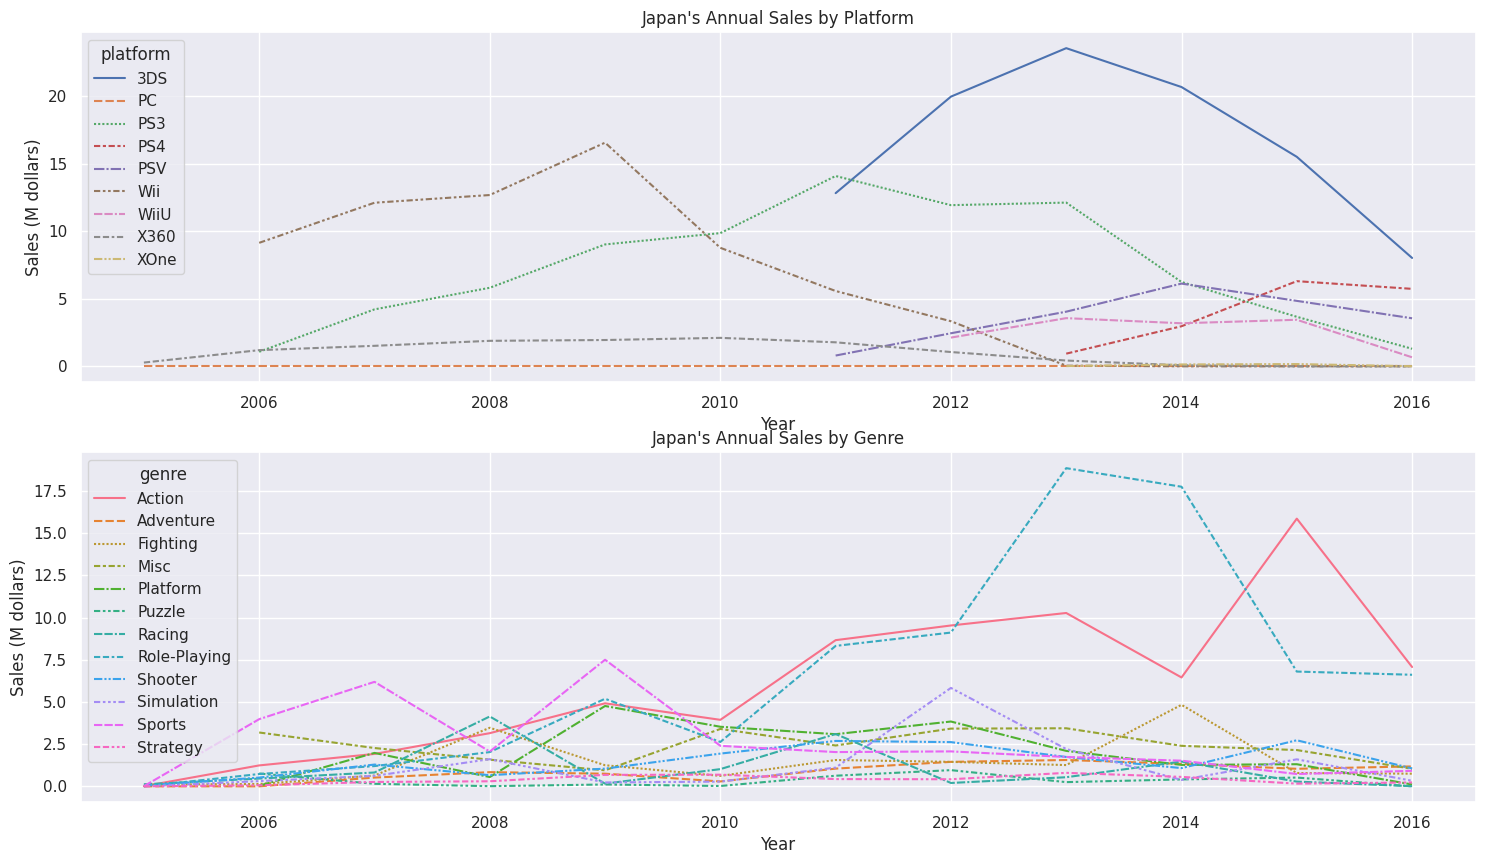

In [60]:
trends('jp')

Arriba: gráfico de ventas anuales en Japón por plataforma. Abajo: gráfico de ventas anuales en Japón por género.

Al igual que para el caso de Norte América, no parece haber cambios drásticos en las tendencias en los últimos años, por lo que es probable que continúen con las mismas tendencias. 

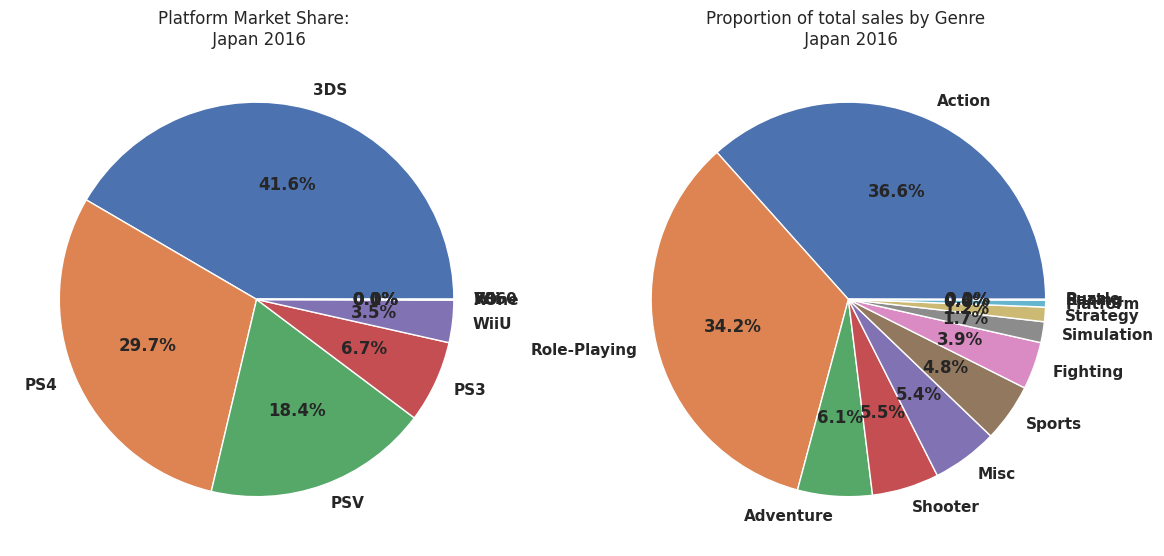

In [61]:
top5('jp')

Las cinco plataformas con mayor cuota de mercado son 3DS con 41.6%, PS4 con 29.7%, PSV con 18.4%, PS3 con 6.7%, Wii U con 3.5%. Estas distribuciones difieren considerablemente de las de Europa y Norte América, con 3DS encabezando la preferencia en plataformas, seguido de PS4 y por primera vez aparece la plataforma PSV en el grupo de líderes. 

Los cinco géneros con mayor proporción de ventas son Acción con 36.6%, Juego de Rol con 34.2%, Aventura con 6.1%, *Shooter* con 5.5% y Misceláneo con 5.4%. Los géneros de Acción y Juego de Rol son los favoritos de los usuarios japonenes, entre ellos acumulan más del 70% de las ventas del 2016. 

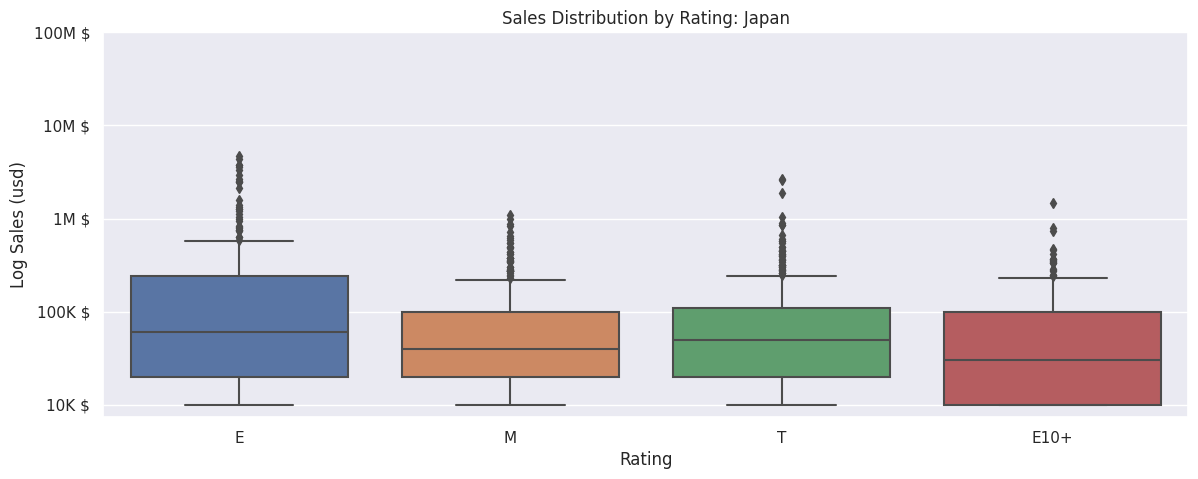

In [62]:
clas_dist('jp')

Diagrama de caja con la distribuciones de ventas en Japón para cada clasificación del sistema ESRB. Las ventas se muestran en escala logarítmica para apreciar las diferencias.

Los juegos con clasificación E tienen una distribución más sesgada. En general la mediana de todos los juegos es paroximadamente la misma, por lo que no parece haber diferencias estadísticamente  significativas entre las ventas promedio de un juego por su clasificación. 

##  Prueba de hipótesis

En esta sección se analiza la factibilidad de dos hipótesis utilizando pruebas estadísticas apropiadas.

### Diferencias entre calificaciones de usuarios Xbox One y PC

Se desea probar si las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas. Se realiza una Prueba T de Student para muestras independientes, la cual prueba la hipótesis nula de que dos muestras independientes tienen valores promedio (esperados) idénticos. Por lo tanto en este caso:

**Hipótesis nula: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.**

**Hipótesis alternativa: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes.**

Antes de realizar la prueba T, se realiza una prueba de Levene para probar la hipótesis nula de que las varianzas de las muestras son iguales. Se asume un valor p=0.05 estándar para este tipo de pruebas.

In [63]:
xone = games[games['platform']=='XOne']

pc = games[games['platform']=='PC']

result_levene = st.levene(xone['user_score'], pc['user_score'], center='median')

if result_levene.pvalue < 0.05:
    print('Rechazamos la hipótesis nula, por lo tanto las varianzas son diferentes' )
else:
    print('No se puede rechazar la hipótesis nula.')


No se puede rechazar la hipótesis nula.


La prueba de Levene confirma que las varianzas no son significativamente diferentes, por lo cual se procede a realizar la prueba principal. 

In [64]:
alpha = 0.05

results = st.ttest_ind(xone['user_score'], pc['user_score'], equal_var=True)

if (results.pvalue < alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

No podemos rechazar la hipótesis nula


Por lo tanto NO se puede asegurar que las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes.

### Diferencias entre calificaciones de videojuegos de acción y deportes

Se desea probar si las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes. Se realiza una prueba T de Student. En este caso:

**La hipótesis nula es: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.**
**La hipótesis alternativa es: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.**
Al igual que en el caso anterior, primero se realiza una prueba de Levene para la hipótesis de que las varianzas son las mismas.

In [65]:
action = games[games['genre']=='Action']

sports = games[games['genre']=='Sports']

result_levene = st.levene(action['user_score'], sports['user_score'], center='median')

if result_levene.pvalue < 0.05:
    print('Rechazamos la hipótesis nula, por lo tanto las varianzas son diferentes' )
else:
    print('No se puede asumir que las varianzas son distintas')

No se puede asumir que las varianzas son distintas


De acuerdo a la prueba anterior, no se puede asegurar que las varianzas son distintas, por lo cual se procede a realizar una prueba T de Student para muestras independientes con varianzas iguales. 

In [66]:
alpha = 0.05

results = st.ttest_ind(action['user_score'], sports['user_score'], equal_var=True)

if (results.pvalue < alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

No podemos rechazar la hipótesis nula


Por lo tanto NO se puede asegurar que las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes. 


## Conclusiones

Se analiza un *data frame* con nombres, géneros, año de lanzamiento, ventas, calificaciones y clasificación de videojuegos. La base contiene datos desde al año 1980 hasta 2016. La base de datos contiene las ventas totales para cada videojuegos en cuatro regiones del mundo: Norte América, Europa, Japón y otras regiones. Se calculan las ventas globales para cada juego.

En el proceso de limpieza de datos se realizan los siguientes cambios:

 * El tipo de datos de las columnas año de lanzamiento y calificación de críticos son cambiados a entero. 
 
 * El tipo de dato de la columna calificación de usuarios se cambia a coma flotante.
 
 * Se llenan los nombres y géneros ausentes con la cadena 'unknown'. 
 
 * Se excluyen 269 filas con año de lanzamiento ausente. 
 
 * Se integra la información de 2 videojuegos duplicados en una sola fila y se eliminan las dos filas con información duplicada. 
 
Se calcula el número de títulos lanzados cada año y se desglosa por género y plataforma, se hacen dos gráficas de barras. Se distinguen periodos con distintos comportamientos en el lanzamiento de títulos estos periodos se pueden considerar aproximadamente de como: antes de 1994, de 1994 al 2000, del 2000 a 2005, de 2005 a 2012 y del 2012 al 2016. Estos periodos tienen comportamientos diferentes tanto en el número de títulos lanzados así como en ventas globales. Los límites de estos periodos coinciden a grandes rasgos con los lanzamientos de nuevas plataformas.

Las diez plataformas con mayores ventas globales de todos los tiempos son: PS2, X360, PS3, Wii, DS, PS, PS4, GBA, PSP, y 3DS. De estas plataformas las que siguen teniendo lanzamientos en 2016 son: PS4, 3DS.

El promedio de ventas por juego de las diez principales plataformas se encuentra entre 200 mil y 800 mil dólares. Sin embargo estos valores pueden ser poco representativos considerando que existen muchos valores atípicos con ganancias mucho mayores.

Más del 75% de los juegos de las plataformas principales no sobrepasan el millón de dólares en ventas globales, y sólo unos cuantos juegos logran superar los 10 millones de dólares en ventas. La mediana de las ventas de los juegos de las 10 plataformas principales se encuentran en alrededor de 100 mil a 300 mil dólares. 

Se identifican las plataformas sin lanzamientos en 2016. Excluyendo a 'DS', en promedio las plataformas tienen lanzamientos de juegos durante 6 años. El 75% de las plataformas viejas sacan lanzamientos de juegos durante menos de 9 años.

Las plataformas que siguen teniendo lanzamientos en 2016 son: 3DS, PC, PS3, PS4, PSV, Wii, WiiU, X360, XOne. De estas plataformas las que tienen menos de 6 años en el mercado son: 3DS, PS4, PSV, WiiU y XOne, por lo que estáas tienen potencial y probablemente tendrán nuevos lanzamientos en 2017.

Las plataformas con mayor potencial a nivel global para el 2017 son PS4, Xbox One, y Nintendo 3DS. Estas plataformas son las que tienen mayores ventas y llevan menos de 6 años en el mercado. En menor medida puede considerarse PC, debido a que sus ventas se mantienen estables a lo largo de varias décadas.

Para comprender la relación entre ventas globales y calificación de críticos y usuarios se realizan gráficos de dispersión con datos de la plataforma Play Station 2.  Para cada gráfico se calculan dos ajustes: uno lineal y uno exponencia y se calculan los coeficientes de correlación de Pearson. Se muestra que:

 * La calificación de los críticos tiene mayor correlación con las ventas globales que la calificación de los usuarios. 
 
 * El ajuste exponencial presenta mejor correlación con los datos que el ajuste lineal en ambos casos.
 
Se hace una comparación de ventas de títulos lanzados simultáneamente en las plataformas PS4 y Xbox One.  Existe una fuerte correlación entre las ventas de ambas plataformas, lo cual sugiere que los usuarios de PS4 y XOne siguen los mismos criterios para comprar juegos. En promedio un título tiene mayores ventas en PS4 que su contraparte en XOne, lo cual sugiere que hay una preferencia del mercado hacia la primer plataforma.

Se relizan tres gráficas de las ventas globales por género: ventas totales, ventas promedio y proporción del total de ventas y se encuentran los siguientes resultados

 * En el último periodo del análisis, los géneros con mayores ventas brutas son Acción, Juego de Rol, Deportes y *Shooter*. 

 * En 2016 los géneros con mayor proporción sobre las ventas totales son en orden de mayor a menor: *Shooter*, Acción, Deportes y Juegos de Rol.
 
 * Los géneros con mayores ventas promedio en 2016 son, en orden de mayor a menor: *Shooter*, Deportes y Juego de Rol. 

Se calcula la cuota de mercado para cada plataforma en 2016  para las regiones de Norte América, Europa y Japón. Las 5 plataformas con mayor cuota de mercado para cada región son:

 * Norte América: PS4 con 47.8%, Xbox One con 31.8%, 3DS con 9.2%, Wii U con 4.7% y PC con 3.0%. 
 
 * Europa: PS4 con 62.0%, Xbox One con 18.8%, PC con 6.9%, 3DS con 4.5% y Wii U con 2.9%. 
 
 * Japón: 3DS con 41.6%, PS4 con 29.7%, PSV con 18.4%, PS3 con 6.7%, Wii U con 3.5%. 
 
Se calculan los cinco géneros con mayor porcentaje del mercado en 2016 para las regiones de Norte América, Europa y Japón en 2016.

 * Norte América: *Shooter* con 36.1%, Acción con 20.7%, Deportes con 16.8%, Juego de Rol con 13.1% y Peleas con 4.1%.
 
 * Europa: *Shooter* con 31.0%, Deportes con 23.4%, Acción con 20.9%, Juego de Rol con 8.4% y Carreras con 3.5%.
 
 * Japón: Acción con 36.6%, Juego de Rol con 34.2%, Aventura con 6.1%, *Shooter* con 5.5% y Misceláneo con 5.4%. 

Se realizaron dos prueba T de Student para muestras independientes con varianzas iguales. Las pruebas indican que: 

 * No se puede asegurar que las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes.
 
 * No se puede asegurar que las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.
